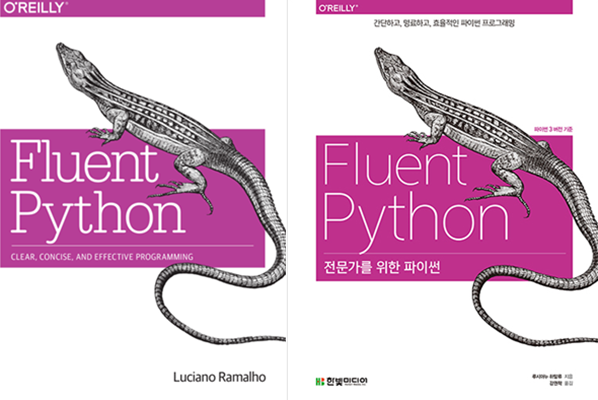

# **Chapter 17. Future를 이용한 동시성(Concurrency with Futures)**

Fluent Python   
17장 Concurrency with Futures 발제 자료

Bowon Kwon  
2023년 6월 11일 발제

# 배경지식

**동시성(Concurrency)**과 **병렬성(Parallelism)**  
https://spacebike.tistory.com/22  
https://medium.com/@su_bak/%EB%8F%99%EC%8B%9C%EC%84%B1-concurrency-%EA%B3%BC-%EB%B3%91%EB%A0%AC%EC%84%B1-parallelism-%EC%9D%98-%EC%B0%A8%EC%9D%B4-44e6fda0a0cd


 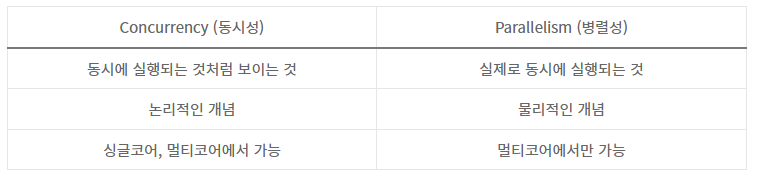


* **동시성**: 실제로는 한 번에 하나의 작업만 번갈아 가면서 처리하는데, 짧은 전환으로 여러 가지 일이 동시에 처리되는 것처럼 보이는 것, e.g. JavaScript는 single-thread 언어  


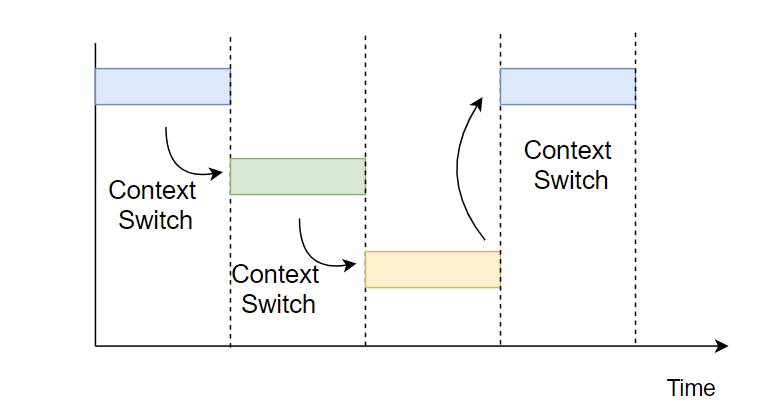  



* **병렬성**: CPU의 여러 개 core가 여러 작업을 한 번에 처리, e.g. multi-thread를 지원하는 Java


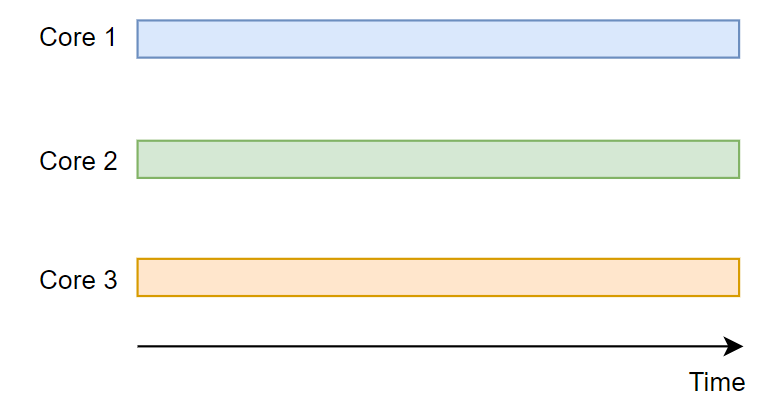


> "동시성은 한 번에 많은 일을 다루는 것이고, 병렬성은 한 번에 많은 일을 처리하는 것이다."  https://medium.com/@su_bak/%EB%8F%99%EC%8B%9C%EC%84%B1-concurrency-%EA%B3%BC-%EB%B3%91%EB%A0%AC%EC%84%B1-parallelism-%EC%9D%98-%EC%B0%A8%EC%9D%B4-44e6fda0a0cd

> "동시적 접근(Concurrent Access)에서는 동기화 문제가 발생한다(Concurrent access to shared data may result in data inconsistency)."  https://spacebike.tistory.com/22

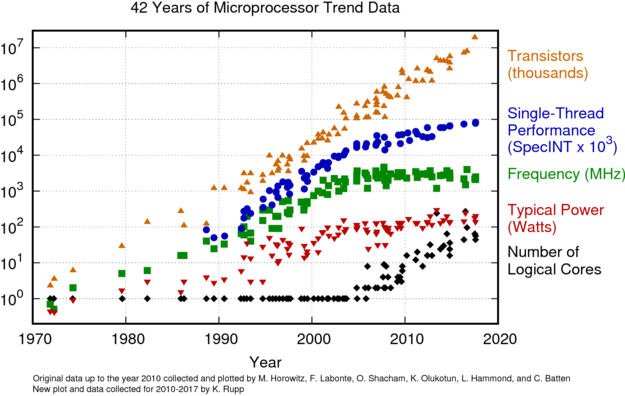




> https://www.karlrupp.net/2018/02/42-years-of-microprocessor-trend-data/



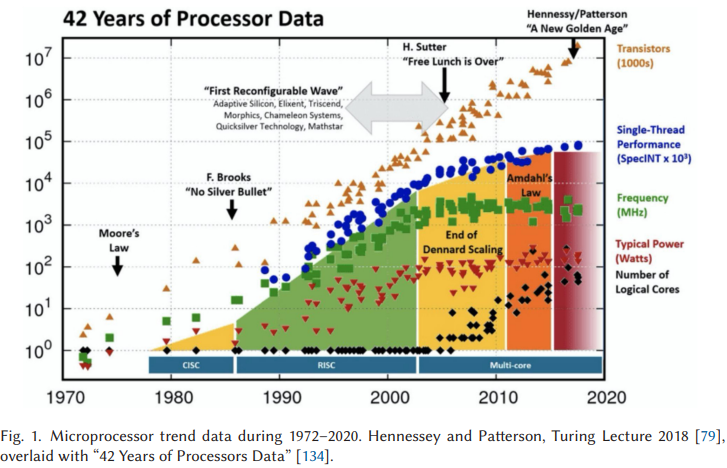


> Rajeev Muralidhar, Renata Borovica-Gajic, and Rajkumar Buyya. 2022. Energy Efficient Computing Systems: Architectures, Abstractions and Modeling to Techniques and Standards. ACM Comput. Surv. 54, 11s, Article 236 (January 2022), 37 pages. https://doi.org/10.1145/3511094

* Thread
   * CPU 제조사 기술
   * 프로그래밍


* 참고할 만한 영상: 코딩하는 거니, "CPU 코어와 스레드(ft.하이퍼스레딩) 가장 쉬운 설명 듣고 가시죠 - [高지식] 거니"  https://youtu.be/_dhLLWJNhwY  

   * Hyper-Threading  (Simultaneous Multithreading; SMT)
   * **Core:** 물리적 CPU, **Thread:** 논리적 CPU
   * 2004&nbsp;&nbsp;&nbsp;&nbsp;1 Core 2 Thread CPU  
   * 2005&nbsp;&nbsp;&nbsp;&nbsp;Multi-Core CPU  
   * 2007&nbsp;&nbsp;&nbsp;&nbsp;Quad-Core CPU  
   * 2008&nbsp;&nbsp;&nbsp;&nbsp;i7 4 Core 8 Thread ...

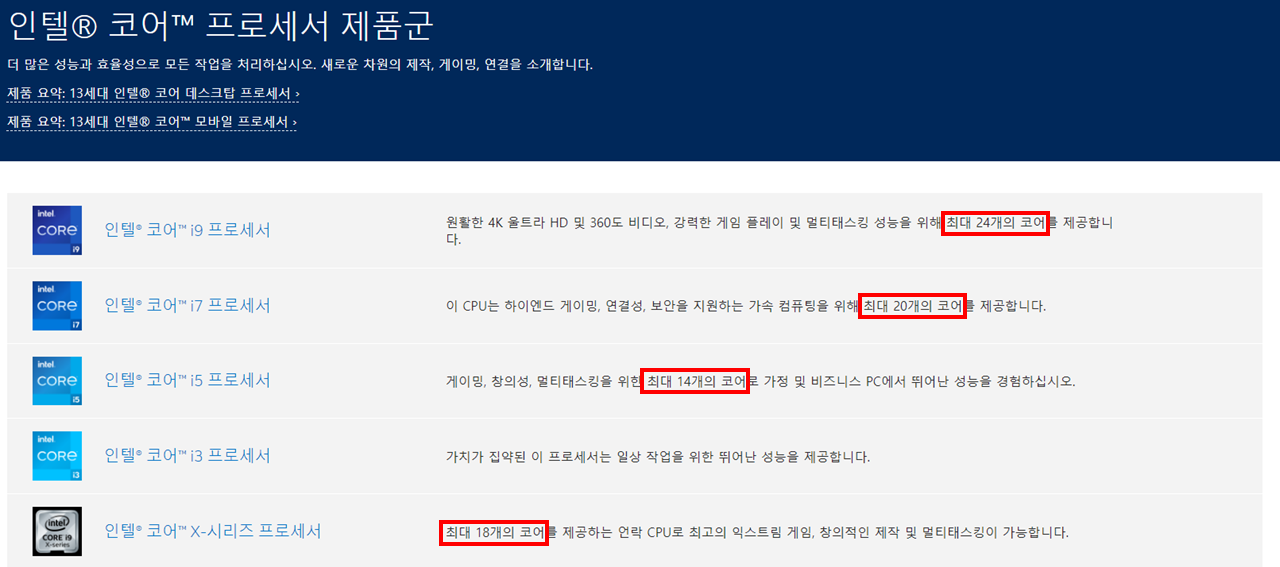

**프로세스(Process)**와 **스레드(Thread)**

* 정적 프로그램(static program)과 동적 프로세스(active process)
   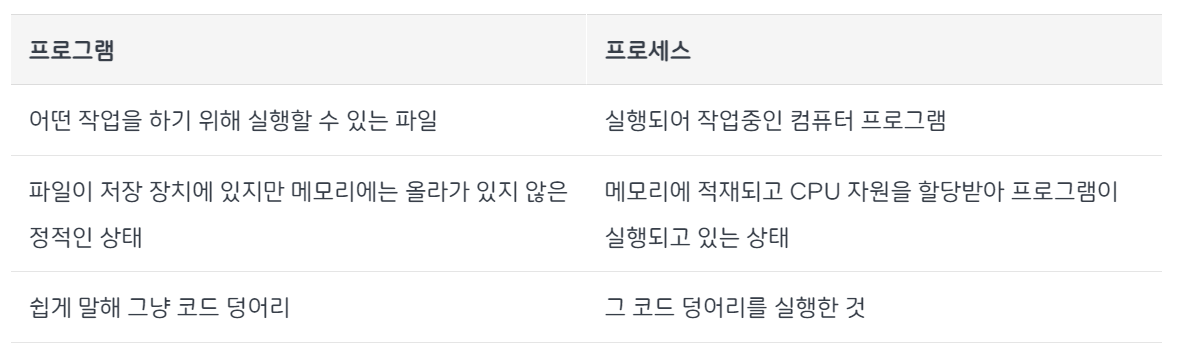
   * https://inpa.tistory.com/entry/%F0%9F%91%A9%E2%80%8D%F0%9F%92%BB-%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4-%E2%9A%94%EF%B8%8F-%EC%93%B0%EB%A0%88%EB%93%9C-%EC%B0%A8%EC%9D%B4  

* 프로세스의 메모리 영역
   * 프로그램이 실행되어 프로세스가 만들어지면 다음 4가지 **메모리** 영역으로 구성되어 할당받게 된다.
   * **코드 영역(Code/text):** 프로그래머가 작성한 프로그램 코드가 CPU가 해석 가능한 기계어 형태로 저장된 영역. CPU는 코드 영역에 저장된 명령어들을 하나씩 처리.
   * **데이터 영역(Data):**  코드가 선언한 전역 변수(global variable), 정적 변수(static variable)가 저장되는 영역. 프로그램이 실행되면서 할당되고 종료되면서 소멸.
   > 데이터 영역은 .data ,.rodata, .bss 영역으로 세분화된다.  
   > **.data:** 전역 변수 또는 정적 변수 등 프로그램이 사용하는 데이터를 저장  
   > **.BSS:** 초기값 없는 전역 변수, 정적 변수가 저장  
   > **.rodata:** const같은 상수 키워드 선언된 변수나 문자열 상수가 저장
   * **스택 영역(Stack):** 함수 안에서 선언된 지역 변수, 매개 변수, 반환 값(return value) 등이 저장되는 영역. 함수의 호출과 함께 할당되며, 함수의 호출이 완료되면 소멸한다. 스택 영역을 초과하면 stack overflow 에러가 발생한다.
   * **힙 영역(Heap):**  생성자, 인스턴스 같이 동적으로 할당되는 데이터들을 위해 존재하는 영역. 사용자에 의해 메모리 공간이 동적으로 할당되고 해제되는 자유공간.

   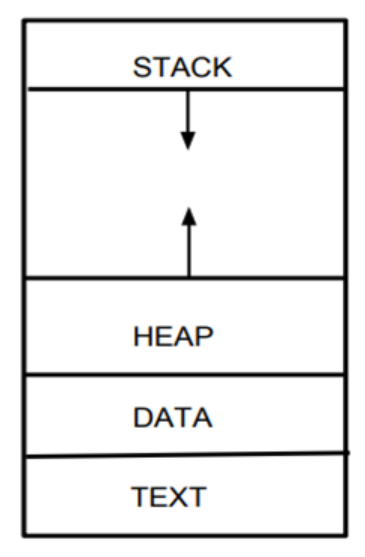

   * Stack과 Heap 위아래로 화살표가 있는데, 코드 영역과 데이터 영역은 선언할 때 그 크기가 결정되는 정적 영역이지만, 스택 영역과 힙 영역은 프로세스가 실행되는 동안 크기가 늘어났다 줄어들기도 하는 동적 영역임을 표현한 것
   * https://inpa.tistory.com/entry/%F0%9F%91%A9%E2%80%8D%F0%9F%92%BB-%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4-%E2%9A%94%EF%B8%8F-%EC%93%B0%EB%A0%88%EB%93%9C-%EC%B0%A8%EC%9D%B4;  https://velog.io/@aeong98/%EC%9A%B4%EC%98%81%EC%B2%B4%EC%A0%9COS-%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4%EC%99%80-%EC%8A%A4%EB%A0%88%EB%93%9C


* PCB(Process Control Block)
   * 운영체제에서 프로세스를 관리하기 위해 해당 프로세스의 상태 정보를 담고 있는 자료구조
   * 프로세스 스케줄링을 위해 프로세스에 관한 모든 정보 저장하는 임시 저장소
   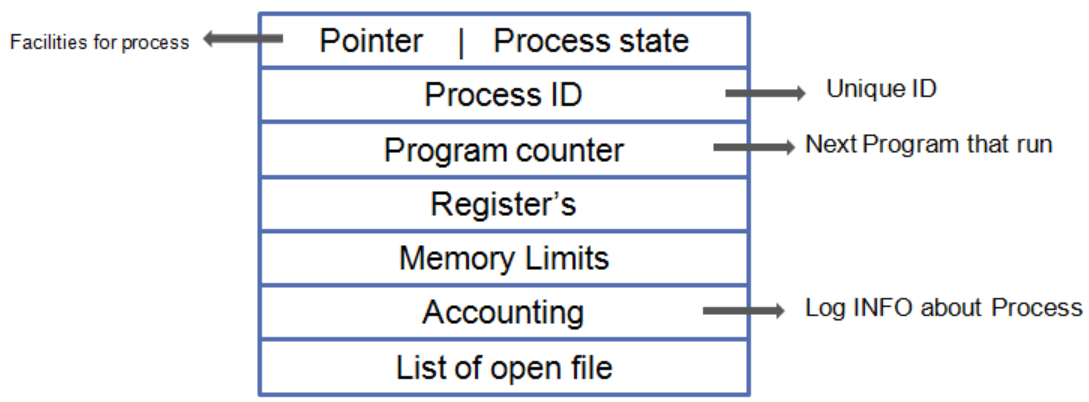

   * 포인터(Pointer): 프로세스의 현재 위치를 저장하는 포인터 정보
   * 프로세스 상태(Process state): 프로세스의 각 상태- 생성(New), 준비(Ready), 실행(Running), 대기(Waiting), 종료(Terminated)-를 저장
   * 프로세스 아이디(Process ID, PID): 프로세스 식별자를 지정하는 고유한 ID
   * 프로그램 카운터(Program counter):  프로세스를 위해 실행될 다음 명령어의 주소를 포함하는 카운터를 저장
   * 레지스터(Register): 누산기, 베이스, 레지스터 및 범용 레지스터를 포함하는 CPU 레지스터에 있는 정보
   * 메모리 제한(Memory Limits): 운영 체제에서 사용하는 메모리 관리 시스템에 대한 정보
   * 열린 파일 목록(List of open file): 프로세스를 위해 열린 파일 목록


* 스레드(thread)
   * 프로세스가 할당받은 자원을 이용하는 실행의 단위
   * 프로세스가 각각 독립된 메모리 영역(Code, Data, Stack, Heap 구조)을 할당받는다면,


   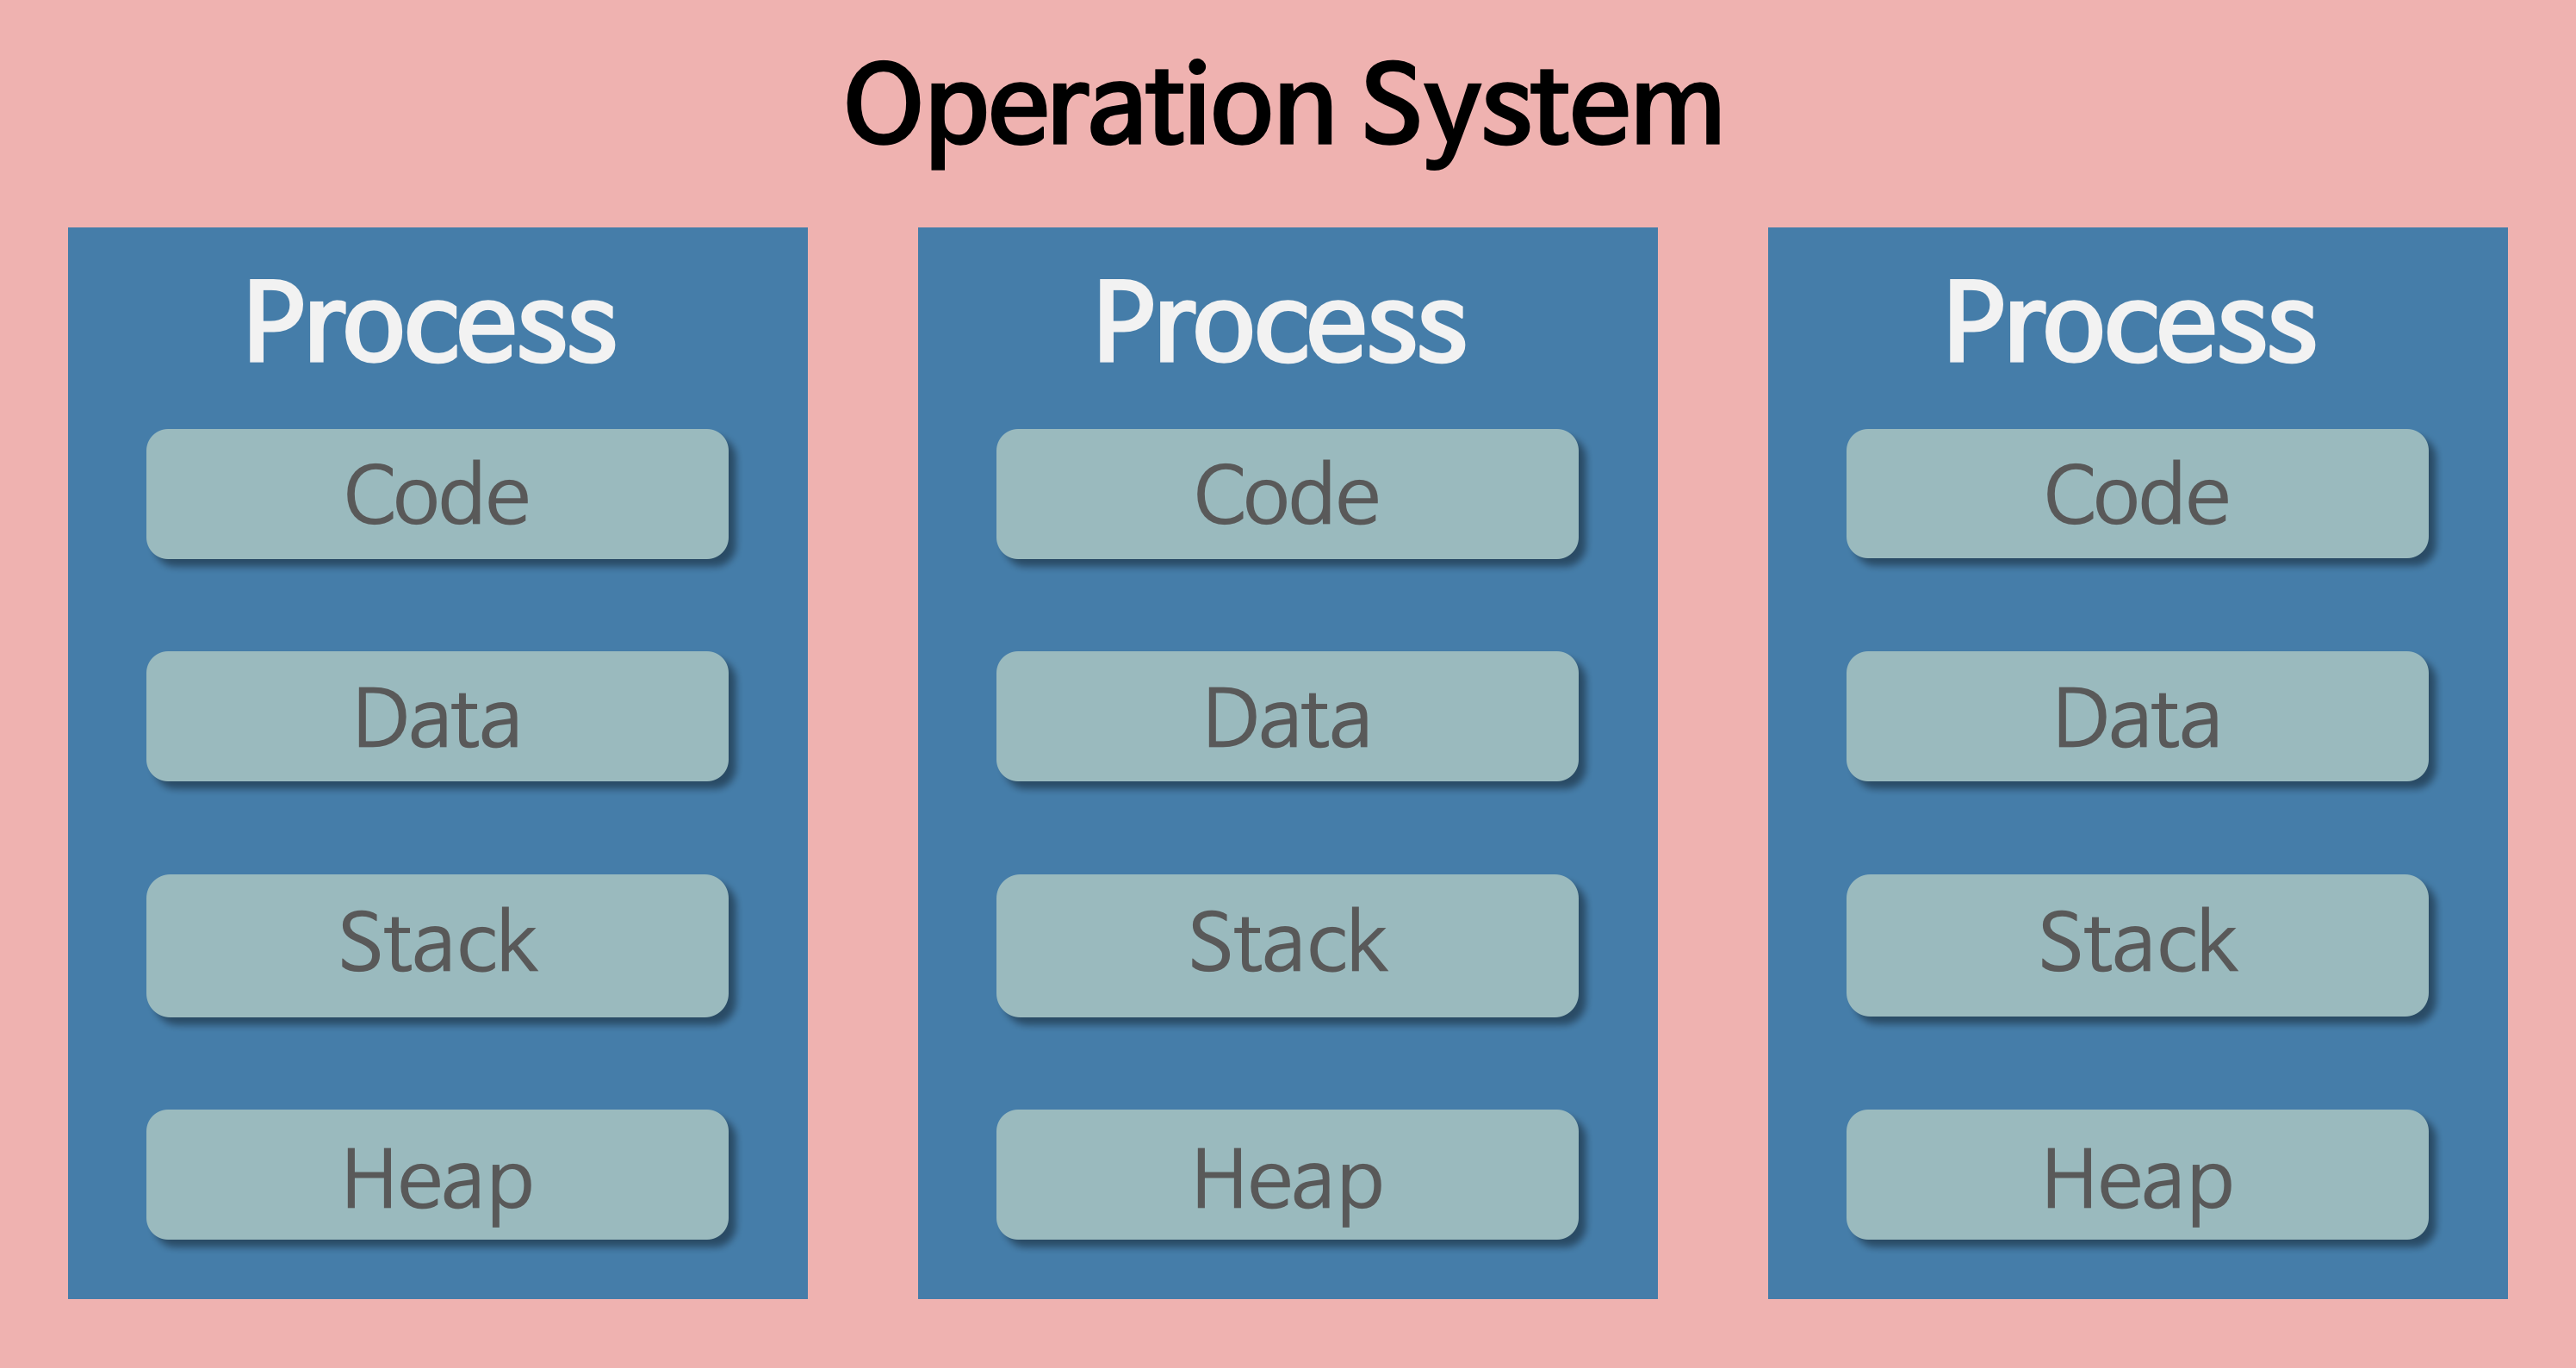


   * 스레드는 각 프로세스에서 Stack만 따로 할당받고 **Code, Data, Heap 영역은 공유**


   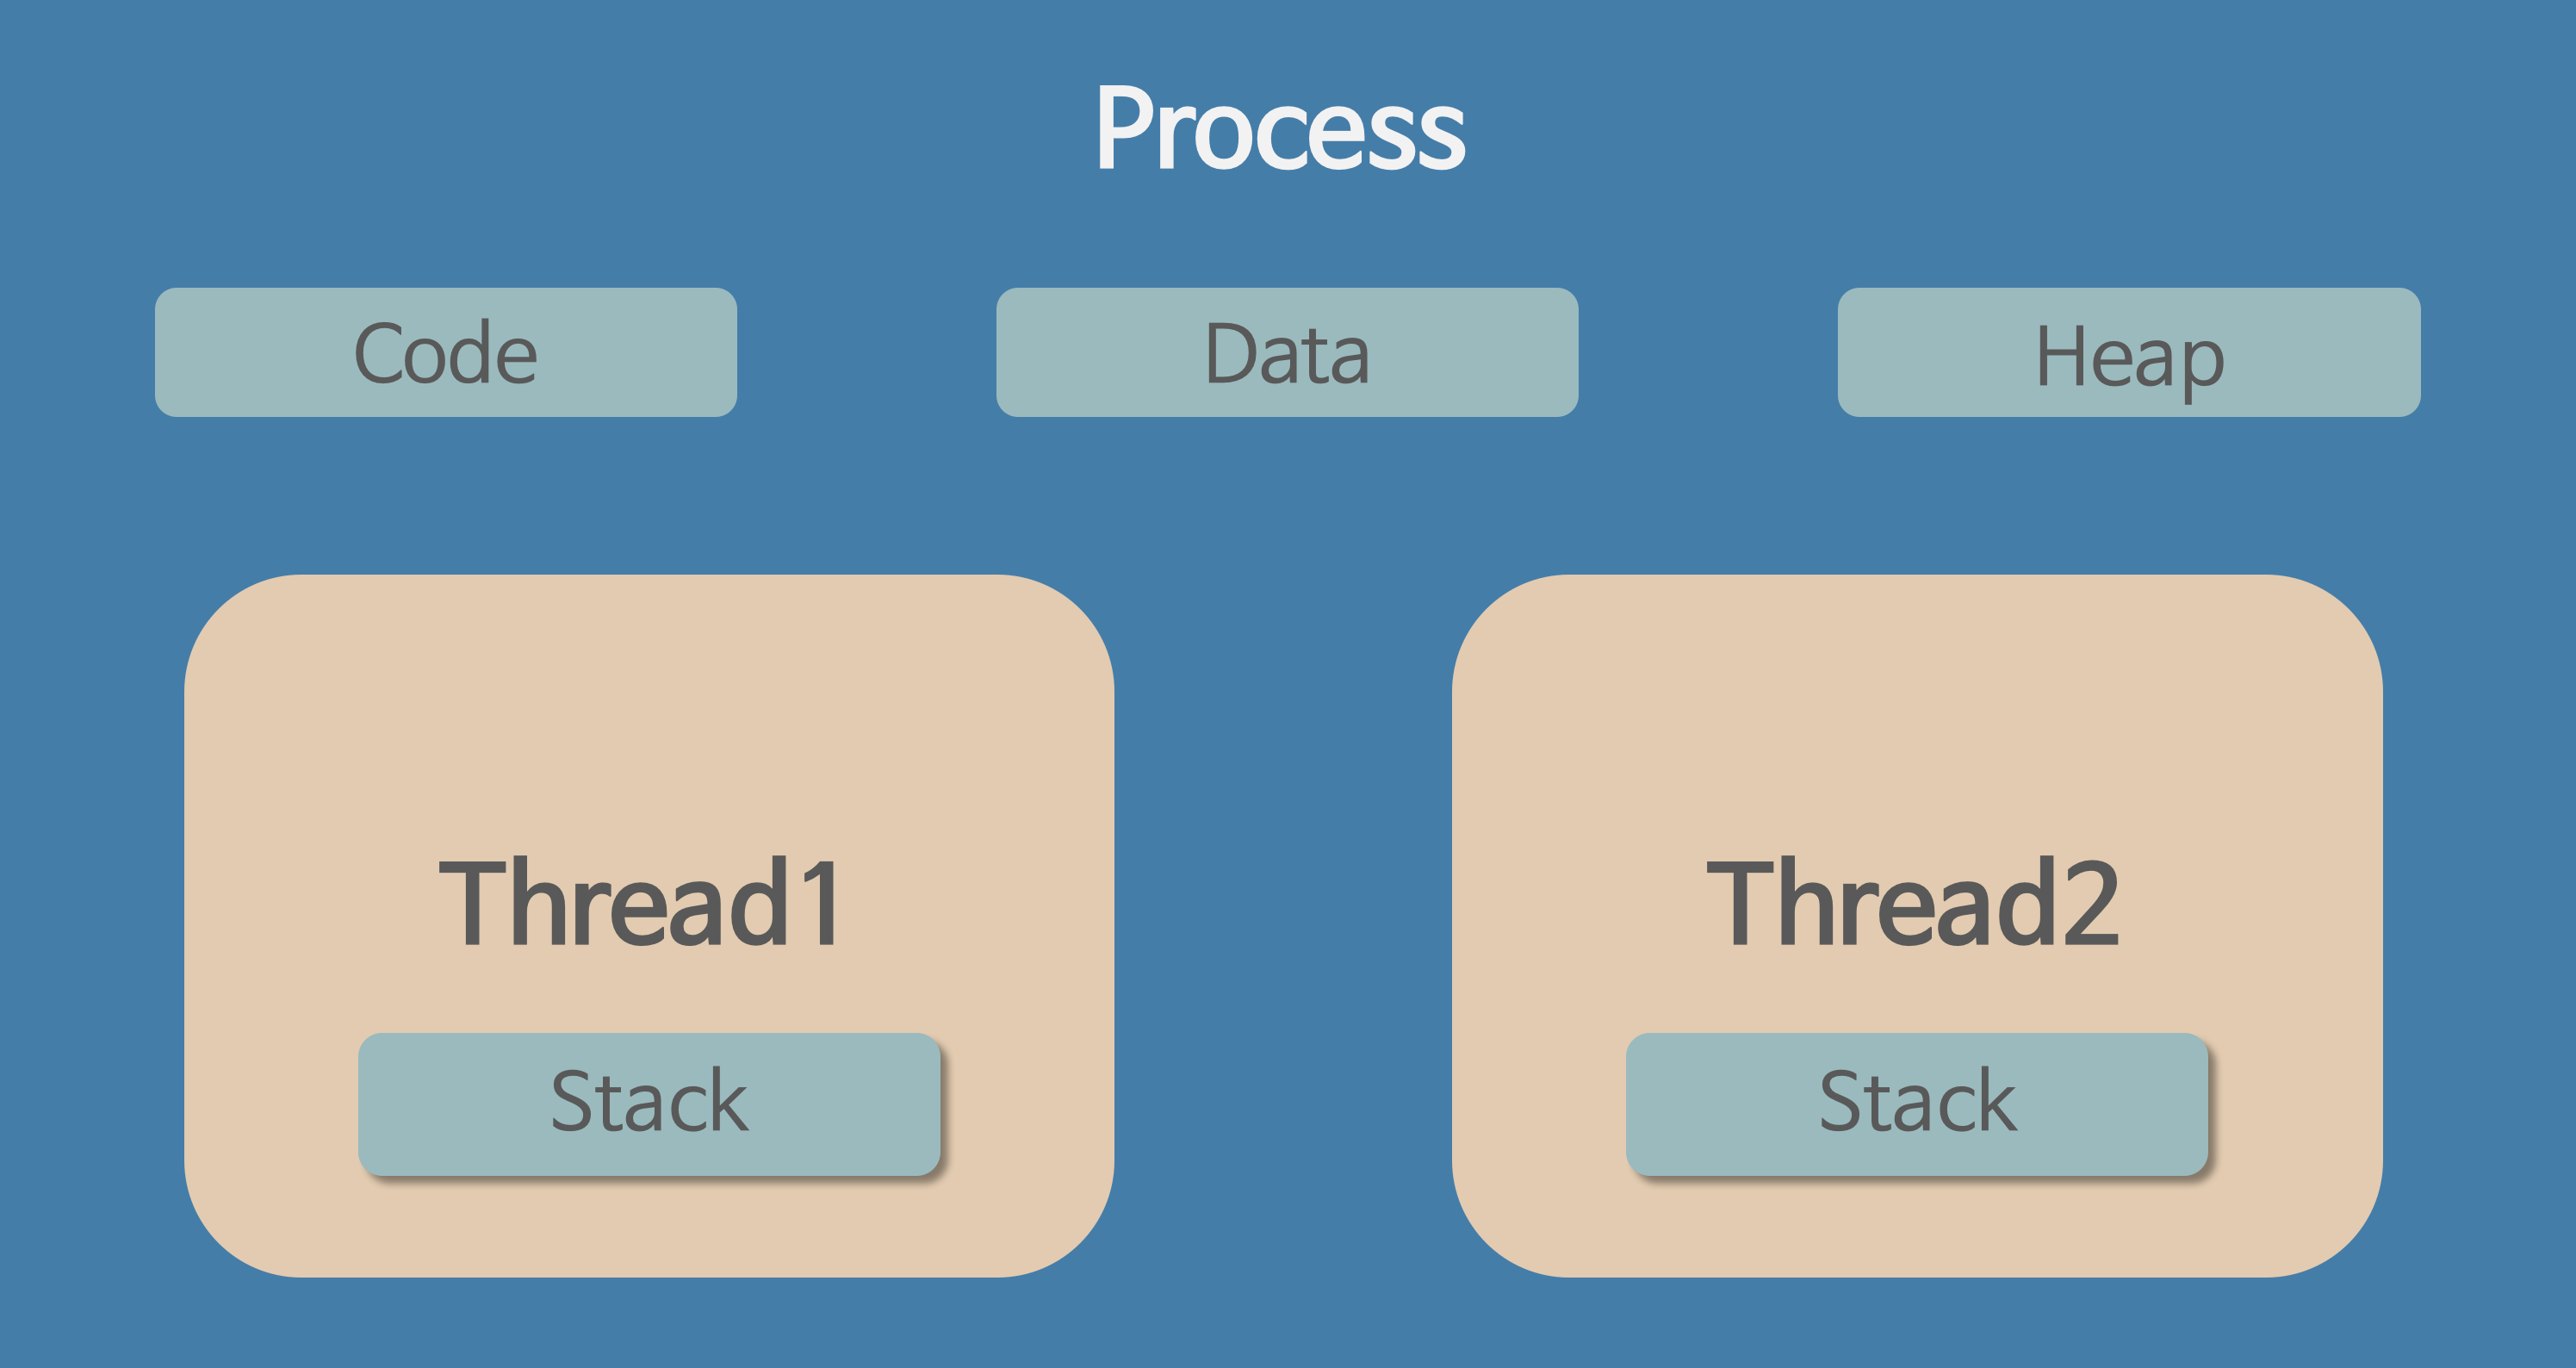



   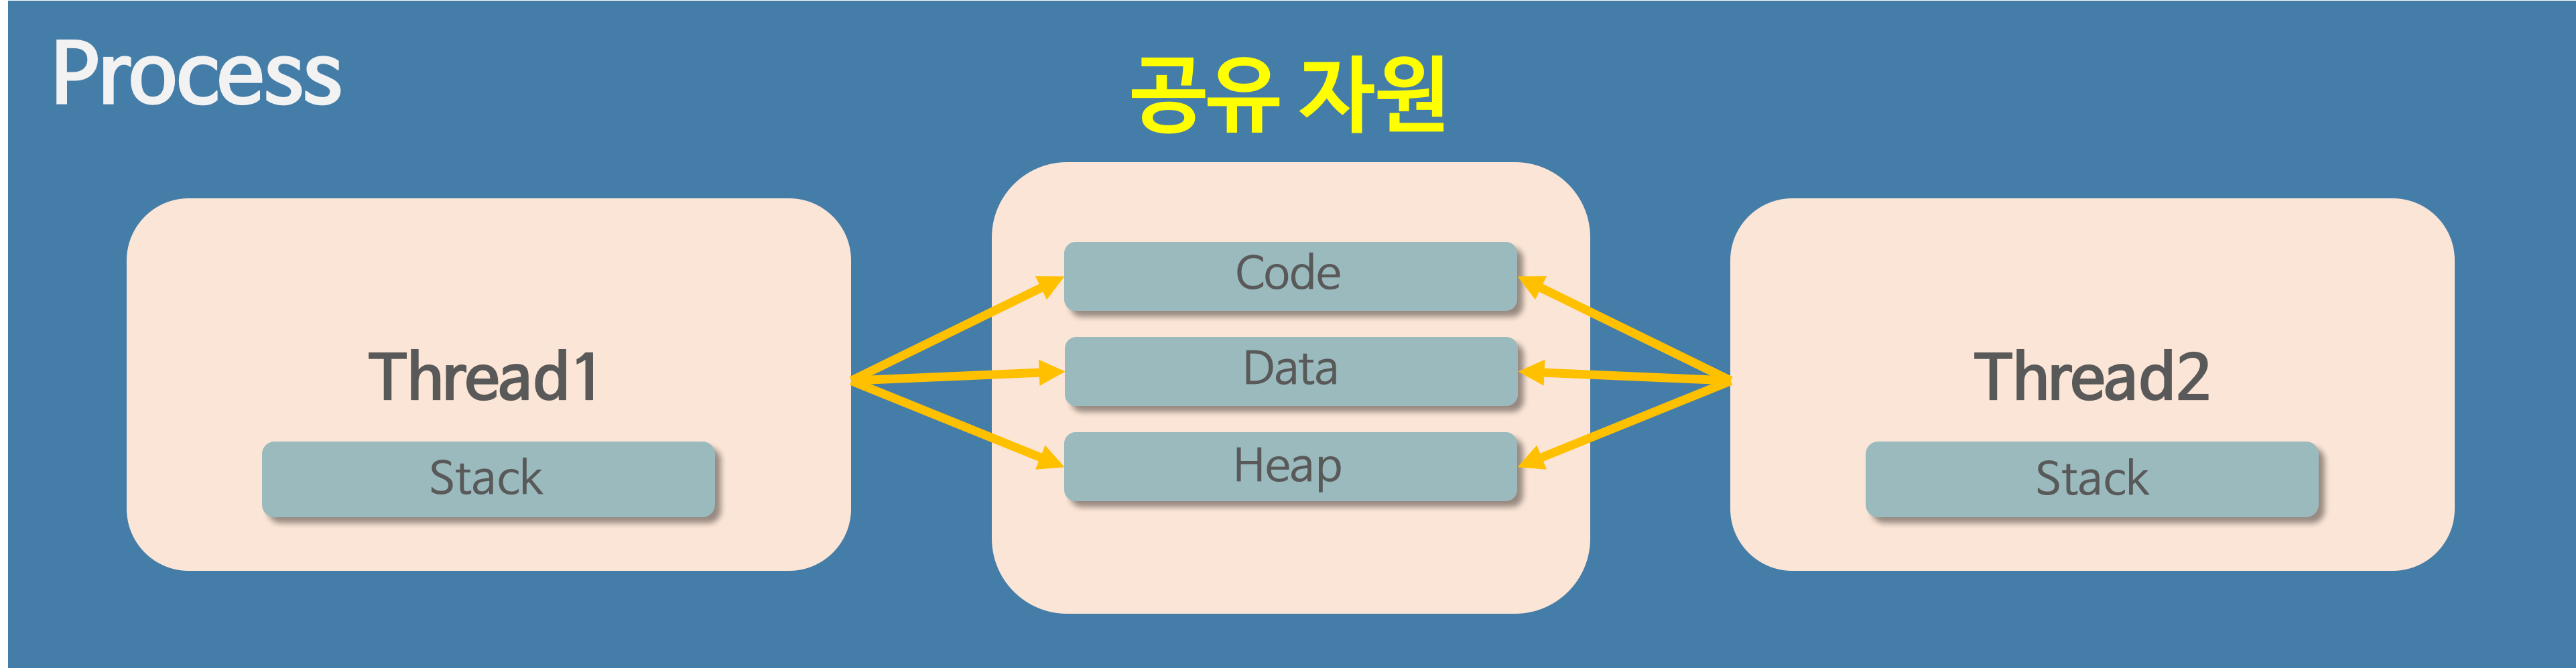

   * https://gmlwjd9405.github.io/2018/09/14/process-vs-thread.html

**멀티프로세싱과 멀티스레딩**
* **멀티프로세싱:** 하나의 응용 프로그램을 여러 개의 프로세스로 구성하여 각 프로세스가 하나의 작업을 처리하도록 하는 것
   * 여러 개의 자식 프로세스 중 하나에 문제가 발생해도 다른 자식 프로세스에 영향이 확산되지 않음(하나의 프로세스가 죽어도 다른 프로세스에 영향을 미치지 않음)
   * 구현이 간단
   * 각 프로세스들이 독립적으로 동작(자원이 서로 다르게 할당됨)하기 때문에 안정적
   * 멀티스레드 보다 많은 메모리 공간과 CPU 시간을 차지
   * 각각 독립된 메모리 영역 가지고 있어 작업량이 많을수록 오버헤드가 발생하고 Context Switching으로 인한 성능 저하 유발
   * 프로세스 사이의 통신이 복잡(IPC 통해야 함)
* **멀티스레딩:** 하나의 응용 프로그램을 여러 개의 스레드로 구성하여 각 스레드가 하나의 작업을 처리하도록 하는 것
   * 프로세스 생성하여 자원을 할당하는 시스템 콜이 줄어들어 자원을 효율적으로 관리할 수 있음, 즉 시스템의 자원과 처리 비용 감소(실행 속도 상승)
   * 스레드들이 자원(Code, Data, Heap)을 공유하고 있기 때문에 데이터를 주고받는 것이 간단하고 자원 소모 적으며 응답 시간이 빠름
   * 스레드 사이의 작업량이 작아(Stack 영역만 처리하면 되기 때문) Context Switching이 빠르고 시스템 처리량 증가
   * 스레드가 개별로 유기적으로 움직이고 있기 때문에 프로그램 테스트, 디버깅이 어려움
   * 전역 변수를 사용하기 때문에 스레드 간의 데이터 공유 시 동기화 문제 발생
   * 하나의 스레드에 문제가 생기면 전체 프로세스에 문제 발생
   * 단일 프로세스 시스템에서 효과 기대하기 어렵고, 다른 프로세스에서 스레드 제어 불가
   * 너무 많은 스레드 사용은 오버헤드를 발생

 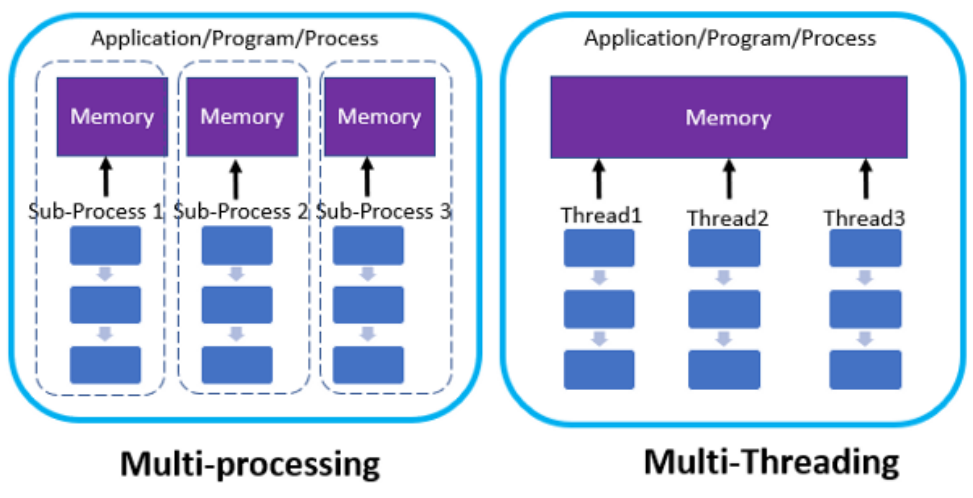

 * https://cocoon1787.tistory.com/688

**병렬 프로그래밍 방법**
* 멀티프로세싱: CPU Bound Application에 적합, e.g. 10개의 부엌, 10명의 요리사, 10개의 요리
* 멀티스레딩: I/O Bound 중에서 빠르게 처리해야 하는 Application에 적합, e.g. 1개의 부엌, 10명의 요리사, 10개의 요리
* Async I/O: I/O Bound 중에서 천천히 처리해도 좋은 Application에 적합, e.g. 1개의 부엌, 1명의 요리사, 10개의 요리  


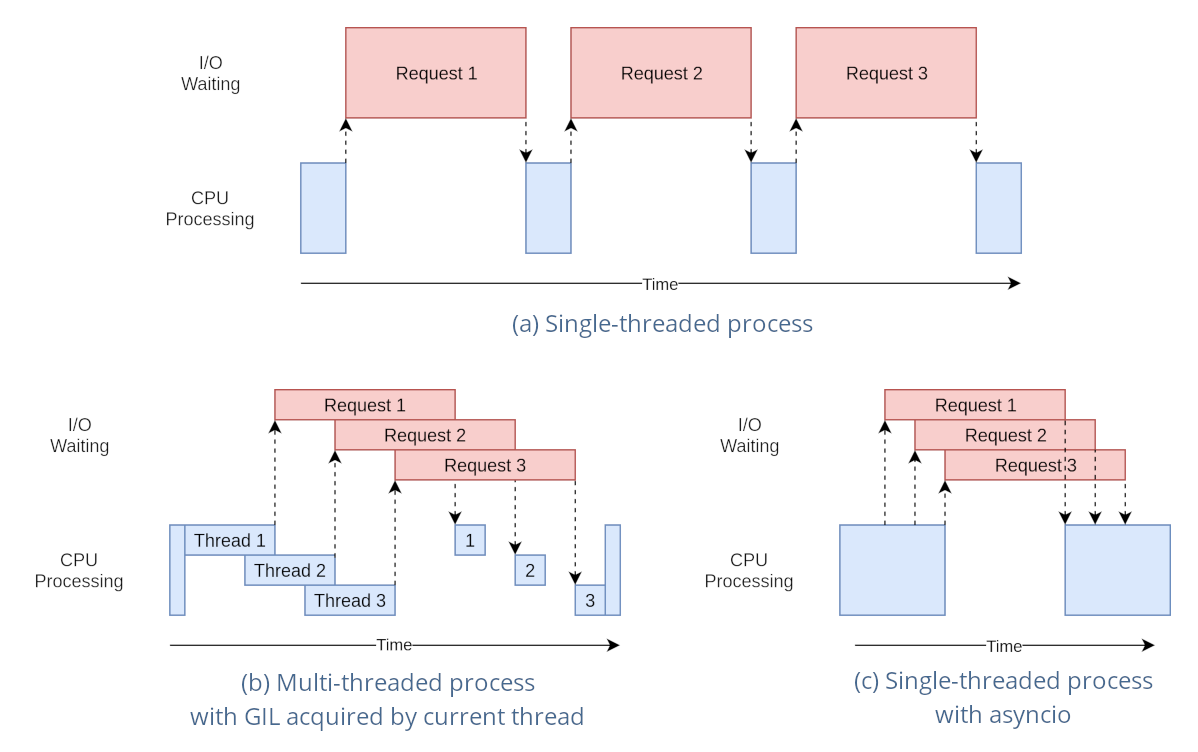  

* https://velog.io/@carrykim/%EB%B6%84%EC%82%B0-%EC%8B%9C%EC%8A%A4%ED%85%9C-2-3.-CPU-Bound-IO-Bound

**파이썬 구현체(Python Implementations)** 종류
* 파이썬 언어로 작성된 프로그램의 실행을 지원하는 프로그램 또는 환경
   * **CPython:** 파이썬 소프트웨어 재단에서 만드는 표준 구현체로, C로 구현
   * **PyPy:** 파이썬으로 작성된 파이썬 구현체로, JIT(Just-In-Time) 컴파일러를 활용하여 빠른 실행 속도를 제공(인터프리터의 단점 보완)
   * **Jython:** Java로 구현되어 JVM 위에서 실행
   * **IronPython:** MS의 .NET Framework의 가상머신인 Common Language Runtime (CLR)상에서 구현하기 위하여 C#으로 작성된 구현체
   * **Cython:** CPython 확장 모듈을 손쉽게 생성할 수 있도록 고안된 컴파일러. 파이썬의 빠른 생산성을 유지하면서도 외부 C 라이브러리와 간결하게 연동하거나 실행 속도를 향상할 수 있도록 해준다.
   * 그 외 다수
* CPython, PyPy는 모두 GIL(Global Interpreter Lock, 전역 인터프리터 락)이 있는 인터프리터
> GIL: 여러 스레드를 사용할 때 단 하나의 스레드만 접근을 허용하는 것
* https://wiki.python.org/moin/PythonImplementations; https://pythaac.tistory.com/254; https://en.wikipedia.org/wiki/Cython


# 들어가며

* **Future**
   * concurrent.futures와 asyncio 내부에 있는 핵심 컴포넌트
   * 대기 중인 작업을 큐에 넣고, 완료 상태를 조사하고, 결과 혹은 예외를 가져올 수 있도록 캡슐화
   * 비동기 작업 실행을 나타내는 객체(objects
representing the asynchronous execution of an operation)
   * Future 클래스의 객체는 완료되었을 수도 있고 아닐 수도 있는 지연된 계산을 표현하기 위해 사용
   * Twisted의 Deferred 클래스, Tornado의 Future 클래스, JavaScript 라이브러리의 Promise 객체와 비슷
   *17장은 concurrent.futures 라이브러리를 중점적으로 다룬다

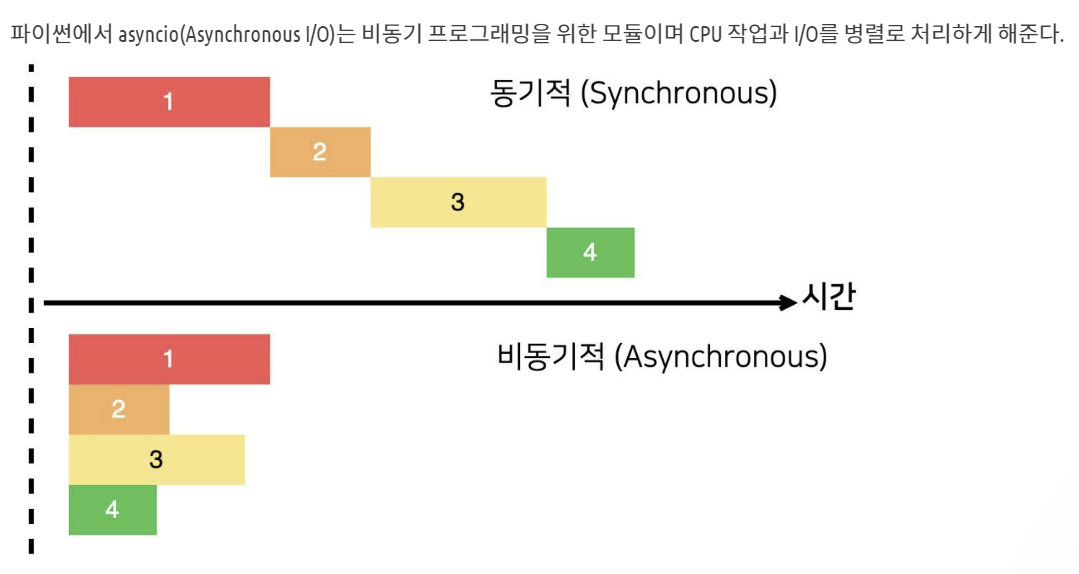

https://www.crocus.co.kr/1686

# 17.1 예제: 세 가지 스타일의 웹 내려받기(Example: Web Downloads in Three Styles)


**flags.py, flags_threadpool.py, flags_asyncio.py** 스크립트를 3번씩 실행한 결과

* 웹에서 20개 국가의 국가 이미지를 내려받는 프로그램
   * **① flags.py**는 **순차적으로** 실행되므로 이미지 내려받아 디스크에 저장한 후 다음 이미지를 내려받음
   * 나머지 둘은 **동시에** 요청한 후 도착하는 대로 파일에 저장(**concurrent** downloads). 단, **② flags_threadpool.py**는 concurrent.futures 패키지를 사용, **③ flags_asyncio.py**는 asyncio를 사용
* flupy.org에서 국가 이미지를 내려받을 때 처음 실행 때는 약간 느릴 수 있지만, 다음 결과는 CDN(Content Delivery Network) 캐시에 이미지가 올라간 후에 얻은 결과
   * 정적 컨텐츠를 전송하는데 쓰이는 지리적으로 분산된 서버 네트워크로 이미지, 비디오, css등을 캐시할 수 있다.
   * https://seungjuitmemo.tistory.com/275
* 아래 결과에서 **① flags.py**는 국가 코드 순서가 같지만, 동시성을 지원하는 **② flags_threadpool.py**, **③ flags_asyncio.py**은 실행할 때마다 매번 내려받는 순서가 달라진다.


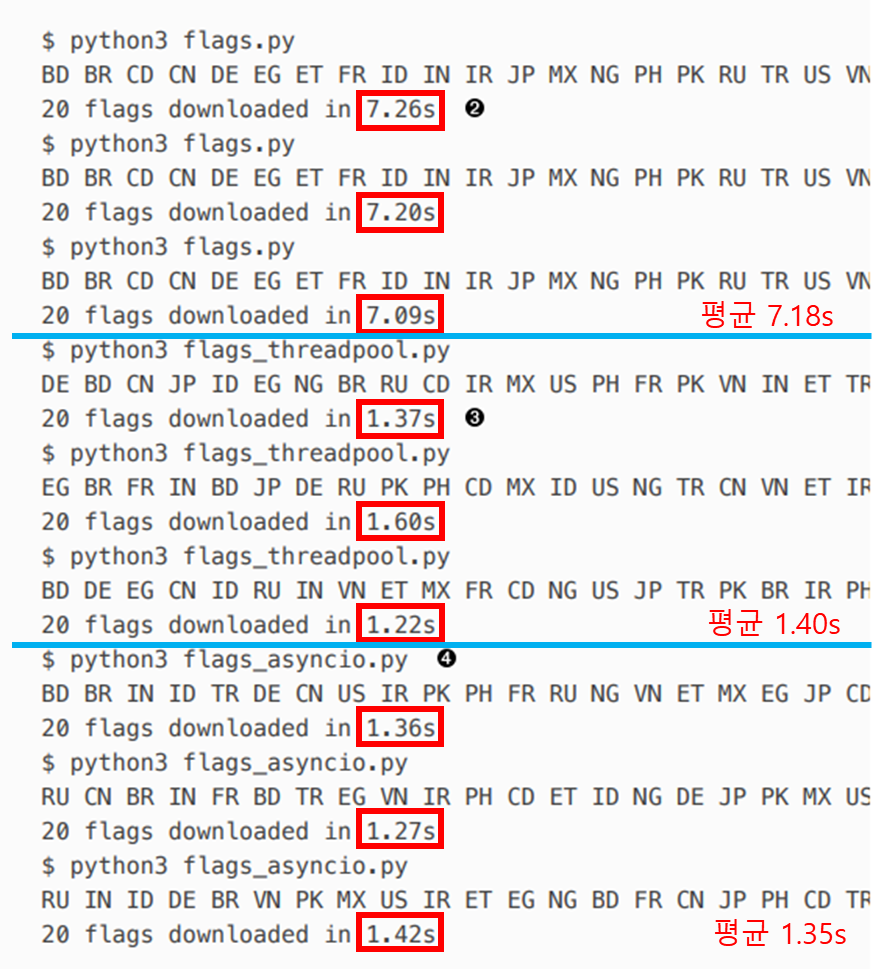


* (입출력 위주의 작업에서) 동시성(concurrent) 스크립트가 순차적(sequential) 스크립트보다 아주 빠르다!

**17.1.1. 순차 내려받기 스크립트**

In [ ]:
# 17-2 flags.py

import os
import time
import sys

import requests  # <1> 표준 라이브러리에 속해 있지 않아 한 줄 띄운 후 임포트

POP20_CC = ('CN IN US ID BR PK NG BD RU JP '
            'MX PH VN ET EG DE IR TR CD FR').split()  # <2> 인구가 많은 순서대로 나열한 20개 국가의 ISO 3166 국가 코드 리스트

BASE_URL = 'http://flupy.org/data/flags'  # <3> 국가 이미지 웹사이트... 뻗음

DEST_DIR = 'downloads/'  # <4> 이미지 저장할 디렉토리를 미리 만들어 두어야 함


def save_flag(img, filename):  # <5> img(바이트 시퀀스)를 DEST_DIR 안의 filename으로 저장
    path = os.path.join(DEST_DIR, filename)
    with open(path, 'wb') as fp:
        fp.write(img)


def get_flag(cc):  # <6> 국가 코드를 인수로 받아서 URL 만들고 이미지(이진 시퀀스) 내려받는다
    url = '{}/{cc}/{cc}.gif'.format(BASE_URL, cc=cc.lower())
    resp = requests.get(url)
    return resp.content


def show(text):
    print(text, end=' ')
    sys.stdout.flush()
# <7> 문자열 출력하고 sys.stdout.flush() 호출해서 진행 상황을 한 줄에 출력
# 일반적으로 파이썬은 개행 문자 받기 전까지 문자열 출력하지 않으므로 sys.stdout.flush() 호출해서 stdout 버퍼에 남아 있는 내용을 모두 화면에 출력하게 해야...

def download_many(cc_list):  # <8> 동시성 버전과 다른 핵심 부분
    for cc in sorted(cc_list):  # <9> 국가 코드를 알파벳 순으로 나오게 만든다. 내려받은 나라 수 반환
        image = get_flag(cc)
        show(cc)
        save_flag(image, cc.lower() + '.gif')

    return len(cc_list)


def main(download_many):  # <10> download_many() 실행에 걸린 시간을 기록하고 출력
    t0 = time.time()
    count = download_many(POP20_CC)
    elapsed = time.time() - t0
    msg = '\n{} flags downloaded in {:.2f}s'
    print(msg.format(count, elapsed))


if __name__ == '__main__':
    main(download_many)  # <11> main()은 내려받기에 사용할 함수들을 인수로 받는 일종의 라이브러리 함수로서, 동시성 버전에서는 download_many()의 동시성 버전을 호출하면 된다.

**17.1.2. concurrent.futures로 내려받기**

In [ ]:
# 17-3 flags_threadpool.py: futures.ThreadPoolExecutor()로 스레드화된 내려받기 스크립트

from concurrent import futures

from flags import save_flag, get_flag, show, main  # <1> 앞의 flags 모듈 함수 재사용

MAX_WORKERS = 20  # <2> ThreadPoolExecutor에서 사용할 최대 스레드 수


def download_one(cc):  # <3> 하나의 이미지를 내려받을 함수, 각 스레드에서 이 함수를 실행
    image = get_flag(cc)
    show(cc)
    save_flag(image, cc.lower() + '.gif')
    return cc


def download_many(cc_list):
    workers = min(MAX_WORKERS, len(cc_list))  # <4> 작업자 스레드 수 설정하되, 허용할 최대 작업자 스레드 수(MAX_WORKERS)와 실제 처리할 항목의 수 중 더 작은 수 사용해서 불필요한 스레드 생성하지 않게
    with futures.ThreadPoolExecutor(workers) as executor:  # <5> 작업자 스레드 수 전달해서 ThreadPoolExecutor 객체 생성
                                                           # executor.__exit__() 메서드는 executor.shutdown(wait=True) 메서드 호출하는데 이 메서드는 모든 스레드 완료될 때까지 블록됨
        res = executor.map(download_one, sorted(cc_list))  # <6> map 메서드는 여러 스레드에 의해 download_one() 함수가 동시에 호출된다는 것 제외하면 내장된 map() 함수와 비슷하게 작동
                                                           # 각 함수가 반환한 값을 가져올 수 있도록 반복할 수 있는 제너레이터 반환

    return len(list(res))  # <7> 가져온 결과의 수 반환


if __name__ == '__main__':
    main(download_many)  # <8> flags 모듈에서 가져온 main() 함수 호출해서 개선된 버전의 download_many() 함수 전달

* ThreadPoolExecutor: 여러 개의 스레드 생성해서 동시성 처리(I/O Bound 작업)
* ProcessPoolExecutor: 여러 개의 프로세스 사용하여 동시성 처리(CPU Bound 작업)

* CPU Bound 작업
   * 프로세스가 진행될 때 CPU 사용 시간이 I/O Waiting보다 많은 경우
   * 행렬곱이나 고속연산할 때 나타나며,
   * CPU 성능에 의해 작업 속도가 결정되므로 성능 향상을 위해 scale-up이 주로 사용


   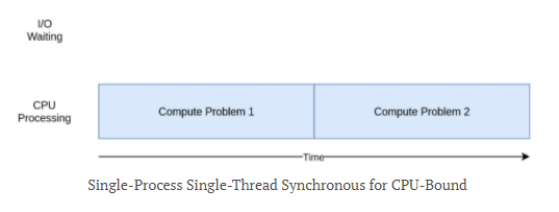


* I/O Bound 작업
   * 프로세스가 진행될 때 I/O Waiting 시간이 많은 경우
   * 파일 쓰기, 디스크 작업, 네트워크 통신할 때 주로 나타나며,
   * 작업에 의한 병목(다른 시스템과 통신할 때 나타남)에 의해 작업 속도가 결정되므로 스레드 개수 늘리거나 동시성을 활용  


   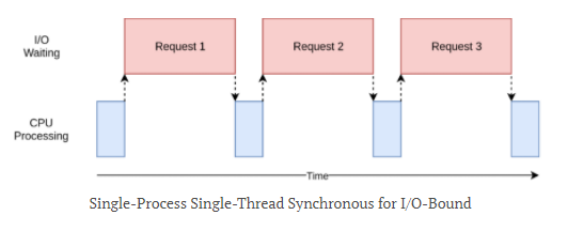  


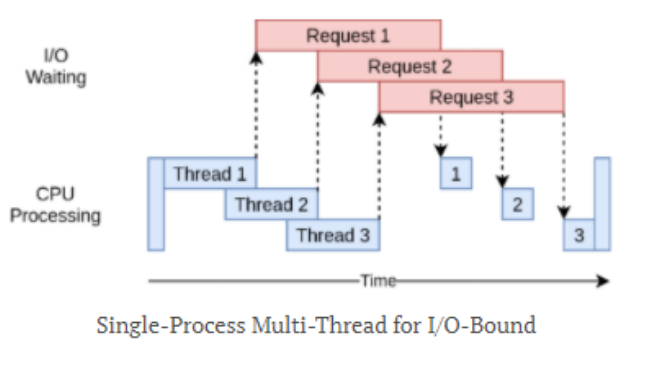  


*  https://velog.io/@carrykim/%EB%B6%84%EC%82%B0-%EC%8B%9C%EC%8A%A4%ED%85%9C-2-3.-CPU-Bound-IO-Bound

**17.1.3. Futures는 어디에 있나?**
* Future는 concurrent.futures와 asyncio 내부에 있는 핵심 컴포넌트이나, 사용자에게 드러나지 않는 경우가 종종 있다.
* 직접 호출해서 사용하지 않기 때문이다.
* Executor.map() 메서드는 내부에서 Future 객체를 사용하는 예, __ next__() 메서드가 호출될 때마다 각 Future 객체의 result() 메서드를 호출하므로, Future 객체 자체가 아니라 Future 객채의 결과를 가져올 수 있게 해준다.

In [ ]:
# 17-4 Future 객체를 실제로 보기 위해 concurrent.futures.as_completed() 함수를 사용하려면, download_many()만 변경하면 된다.
# 즉, download_many() 함수 안의 executor.map()을 executor.submit()과 future.as_completed()로 대체한다.
# print() 문 추가해서 완료 전후의 Future 객체 출력

from concurrent import futures

from flags import save_flag, get_flag, show, main

MAX_WORKERS = 20


def download_one(cc):
    image = get_flag(cc)
    show(cc)
    save_flag(image, cc.lower() + '.gif')
    return cc


# BEGIN FLAGS_THREADPOOL_AS_COMPLETED
def download_many(cc_list):
    cc_list = cc_list[:5]  # <1> 인구가 많은 다섯 나라만 사용
    with futures.ThreadPoolExecutor(max_workers=3) as executor:  # <2> 대기 중인 Future 객체를 출력해서 보기 위해 max_workers=3으로 하드코딩
        to_do = []
        for cc in sorted(cc_list):  # <3> 결과의 순서가 뒤바뀐다는 것을 확인하기 위해 국가 코드를 알파벳순으로 반복
            future = executor.submit(download_one, cc)  # <4> 콜러블이 실행될 수 있도록 스케줄링하고 이 작업을 나타내는 Future 객체 반환
            to_do.append(future)  # <5> 나중에 as_completed로 가져올 수 있도록 Future 객체 모두 저장
            msg = 'Scheduled for {}: {}'
            print(msg.format(cc, future))  # <6> 국가 코드와 해당 Future 객체를 메시지로 출력

        results = []
        for future in futures.as_completed(to_do):  # <7> as_completed는 Future가 완료될 때 해당 Future 객체 생성
                                                    # (Future 객체 담은 반복형을 인수로 받아 완료된 Future 객체 생성하는 반복자 반환, 완료된 Future 객체를 꺼내는 루프 만들 때 사용할 수 있음)
            res = future.result()  # <8> 이 Future 객체의 결과를 가져온다
            msg = '{} result: {!r}'
            print(msg.format(future, res)) # <9> Future 객체와 이 객체의 결과 출력
            results.append(res)

    return len(results)
# END FLAGS_THREADPOOL_AS_COMPLETED

if __name__ == '__main__':
    main(download_many)

result() 메서드
* Future 객체의 작업이 완료된 경우 callable의 결과를 반환하거나, callable을 실행할 때 발생한 예외를 다시 발생시킨다.
* concurrency.futures.Future 객체의 f.result()는
   * 결과가 나올 때까지 호출자의 스레드를 블로킹
   * 선택적으로 timeout 인수를 전달할 수 있으며, 지정한 시간까지 Future 객체의 작업이 완료되지 않으면 TimeoutError 예외가 발생
   * yielf from 사용할 수 없음
* asyncio.Future.result()는
   * 시간 초과를 지원하지 않으며,
   * yield from 사용해서 Future 객체의 상태를 가져오는 방법 선호

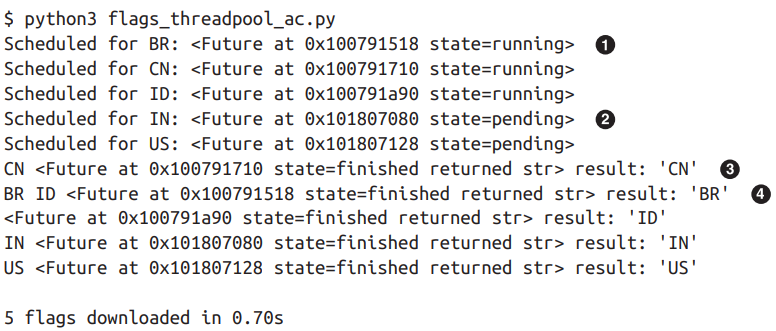  

① Future 객체가 알파벳순으로 스케줄링 되었고, 작업자 스레드 수를 최대 3으로 설정했기 때문에 처음 3개만 실행 중  
② 마지막 2개의 Future 객체는 대기 중으로, 작업자 스레드를 기다리고 있음  
③ 제일 앞 두 글자 CN은 download_one()이 출력한 메시지, 그 뒤부터 줄 맨 뒤까지는 모두 download_many()가 출력한 것  
④ 주 스레드의 download_many()에서 첫 스레드 BR의 결과 출력하기 전에 BR과 ID 스레드가 국가 코드 먼저 출력??

※ flags_threadpool_ac.py 여러 번 실행하면 결과 순서가 달라지는데, max_workers를 5로 설정하면 결과 순서가 더욱 다양하게 달라지는 반면, 1로 설정하면 코드가 순차적으로 실행되므로 언제나 submit()을 호출한 결과가 나온다.



※ 지금까지 테스트한 동시성 스크립트는 어느 것도 병렬로 내려받을 수 없다.
* concurrent.futures는 GIL에 의해 제한
* flags_asyncio.py는 단일 스레드로 실행  


☞ 파이썬 스레드가 한 번에 한 스레드만 실행할 수 있게 해주는 GIL에 의해 제한된다면, 어떻게 flags_threadpool.py가 flags.py보다 5배나 빨리 실행될까? (답: 입출력 위주 처리에는 GIL이 미치는 악영향이 거의 없음)  


☞ 둘다 단일 스레드인데, 어떻게 flags_asyncio.py가 flags.py보다 5배나 빨리 실행될 수 있을까? (답: 18.3 '블로킹 호출을 에둘러 실행하기')

# 17.2 블로킹 I/O와 GIL(Blocking I/O and the GIL)

* CPython 인터프리터는 내부적으로 스레드 안전(thread-safe)하지 않으므로, GIL 갖고 있음
   * CPython은 레퍼런스 카운팅(Reference Countin)에 따라 메모리 관리
   * 객체 생성해서 사용할 때마다 해당 객체의 reference cout를 1씩 증가시키고 해제할 때 1씩 감소시킴, LRU(Least Recently Used) 기반 Garbage Collection
   * https://otugi.tistory.com/338; https://medium.com/dmsfordsm/garbage-collection-in-python-777916fd3189  
   * PyPy도 GIL 가지고 있지만, Jython이나 IronPython에는 없음(Java와 C#은 레퍼런스 카운팅 방식으로 Garbage Collecting하지 않음)

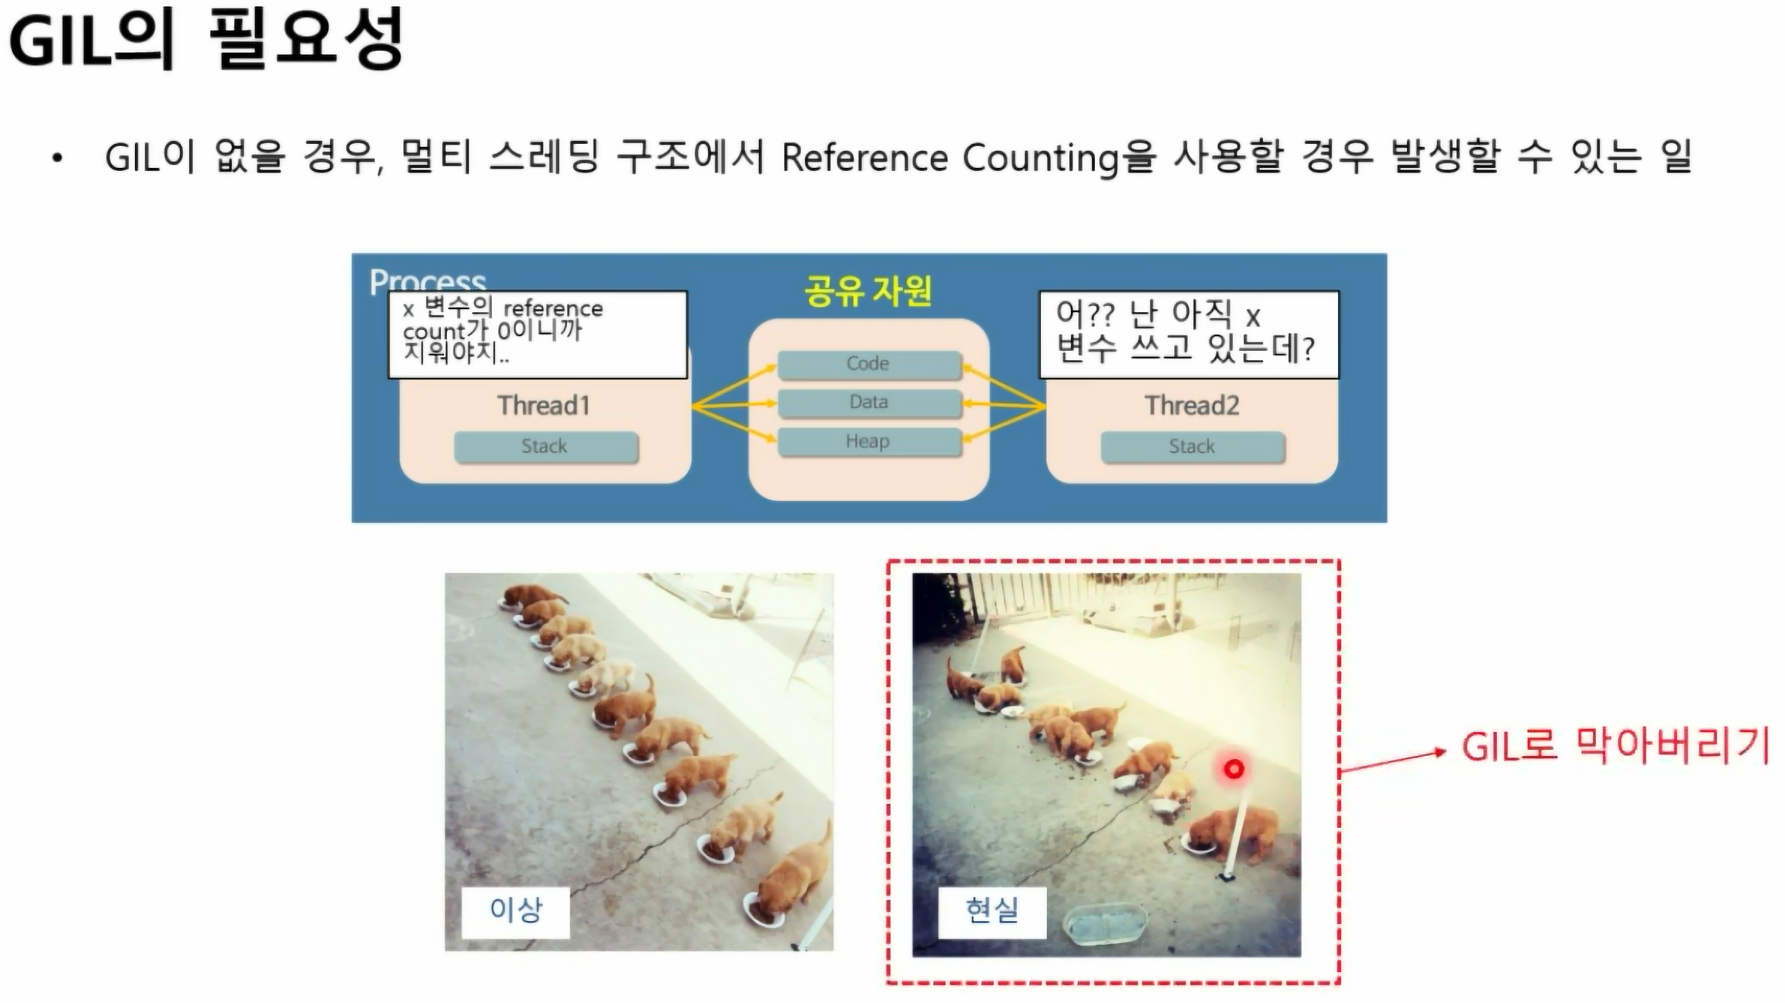  

* 위 그림과 같은 사태(강아지가 스레드, 사료가 자원) 방지하기 위해 GIL로 막아버림
* 코딩하는 초롱, 파이썬 병렬 프로그래밍 with GIL https://youtu.be/SyIvYUgDbjA

* GIL은 한 번에 한 스레드만 파이썬 바이트코드를 실행하도록 제한하여 단일 프로세스가 동시에 다중 CPU 코어를 사용할 수 없음
   * I/O 작업(으로 인한 블로킹) 많은 멀티스레딩 구조에서는 유리
   * 단, 어떤 스레드가 점유권 가져갈지는 거의 랜덤에 가깝다고 함
   * https://m.blog.naver.com/alice_k106/221566619995


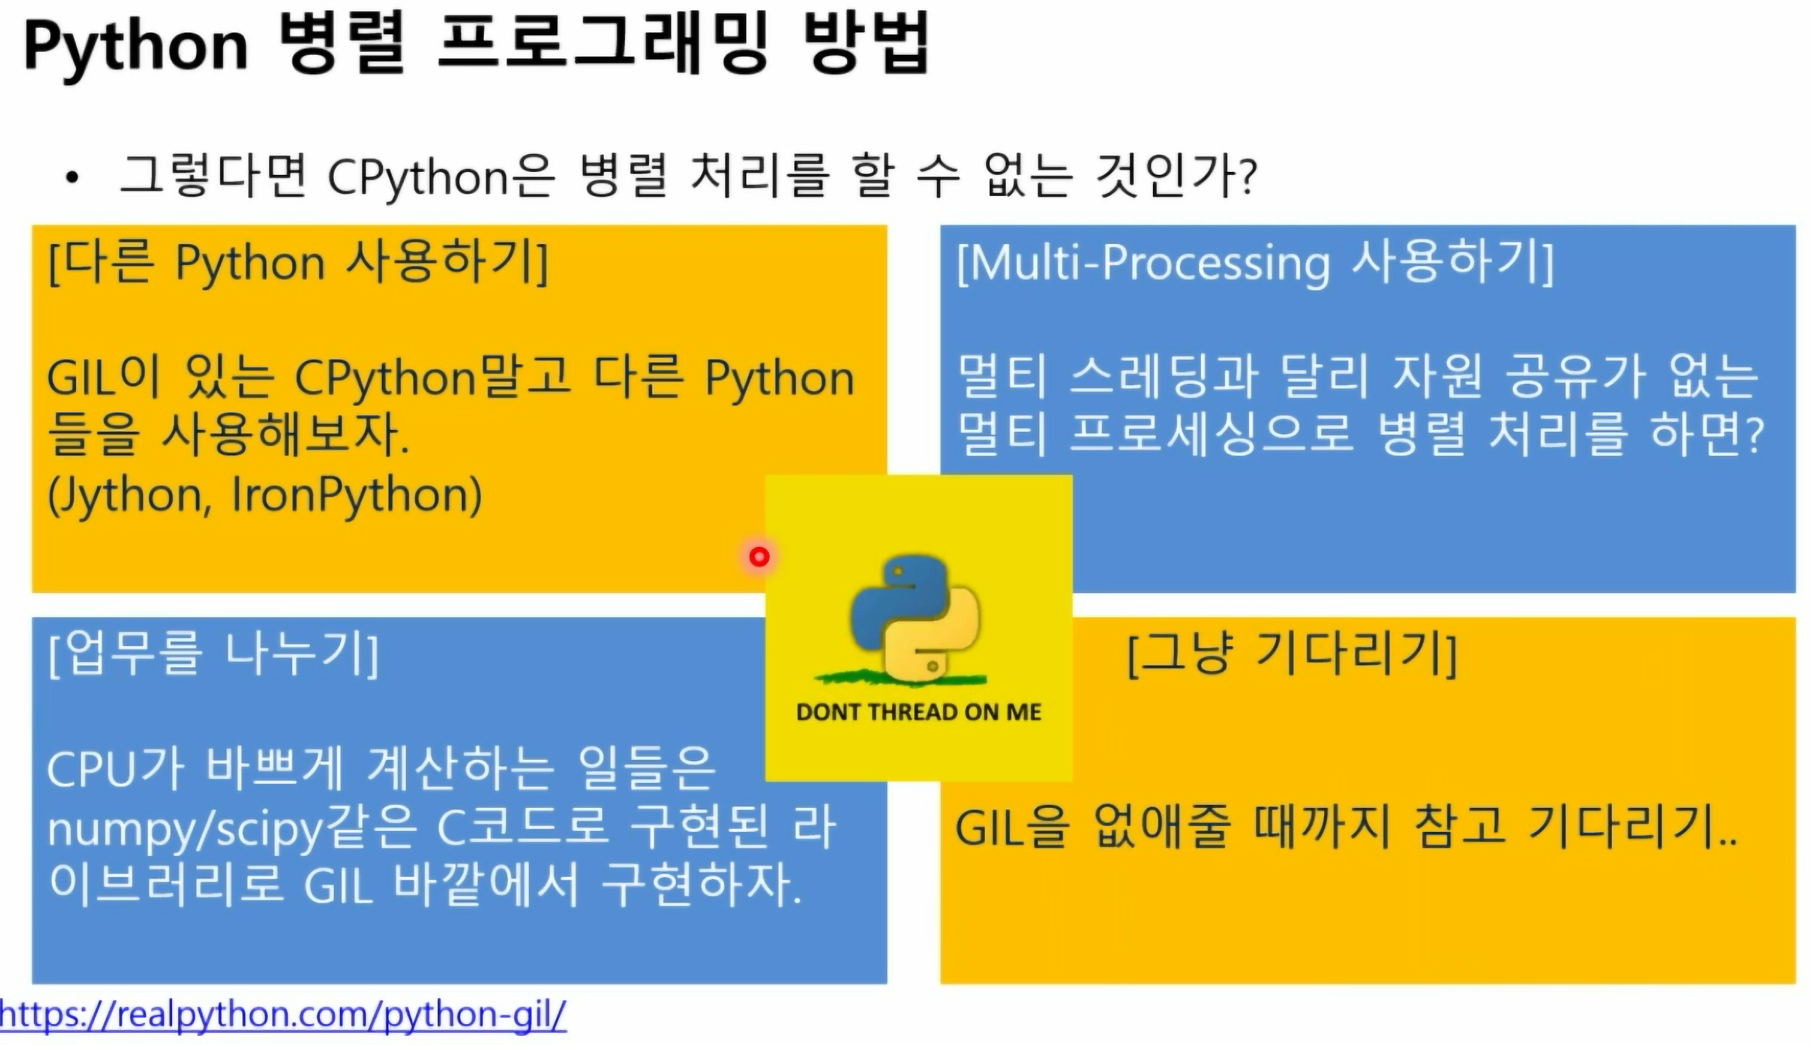


* 파이썬 코드를 작성할 때 GIL을 제어할 수는 없어도 내장함수나 C로 된 확장은 시간이 오래 걸리는 작업을 실행할 때 GIL 해제할 수 있음
   * 파이썬 표준 라이브러리의 모든 블로킹 입출력 함수는 GIL 해제해서 다른 스레드가 실행될 수 있게 해줌
   * 그렇기 때문에 I/O Bound 작업에서는 단일 CPU로 여러 스레드를 만들어서 작업할 수 있는 ThreadPoolExecutor가 효율적이었던 것
   * GIL 사용하고 있더라도 파이선 쓰레드는 입출력 위주 애플리케이션에서는 엄청난 효용성 있음!

# 17.3 concurrent.futures로 프로세스 실행하기(Launching Processes with concurrent.futures)

* concurrent.futures 문서 페이지의 부제는 **"병렬 작업의 시행(Launching Parallel tasks)"**
   * https://docs.python.org/3/library/concurrent.futures.html
* **ProcessPoolExecutor**는 멀티프로세싱 모듈을 사용
   * 작업을 여러 파이썬 프로세스에 분산시켜 진정한 병렬 컴퓨팅을 가능하게 함
   * GIL을 우회하므로 **계산 위주 작업**을 수행해야 하는 경우 가용한 CPU 모두 사용
   * 그러나 국기를 내려받는 프로그램처럼 **입출력 위주 작업**에서는 도움이 안 됨


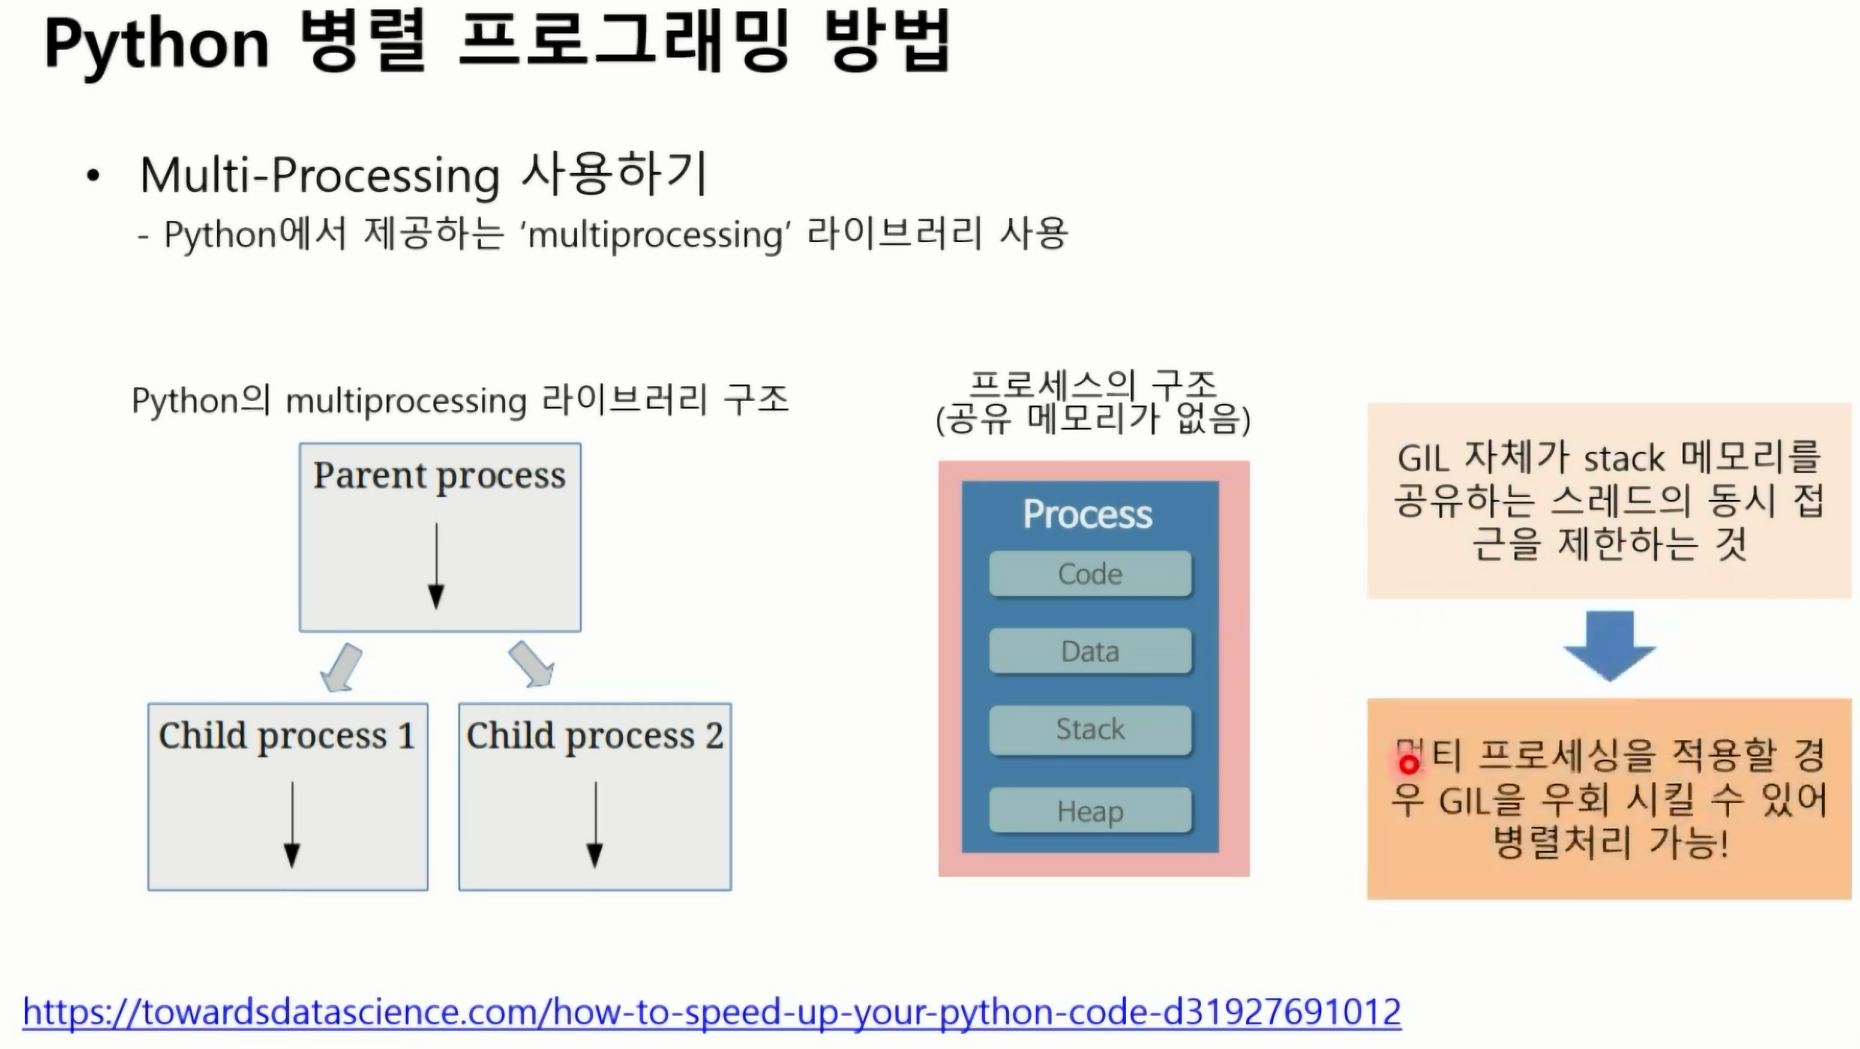

* 코딩하는 초롱, 파이썬 병렬 프로그래밍 with GIL https://youtu.be/SyIvYUgDbjA

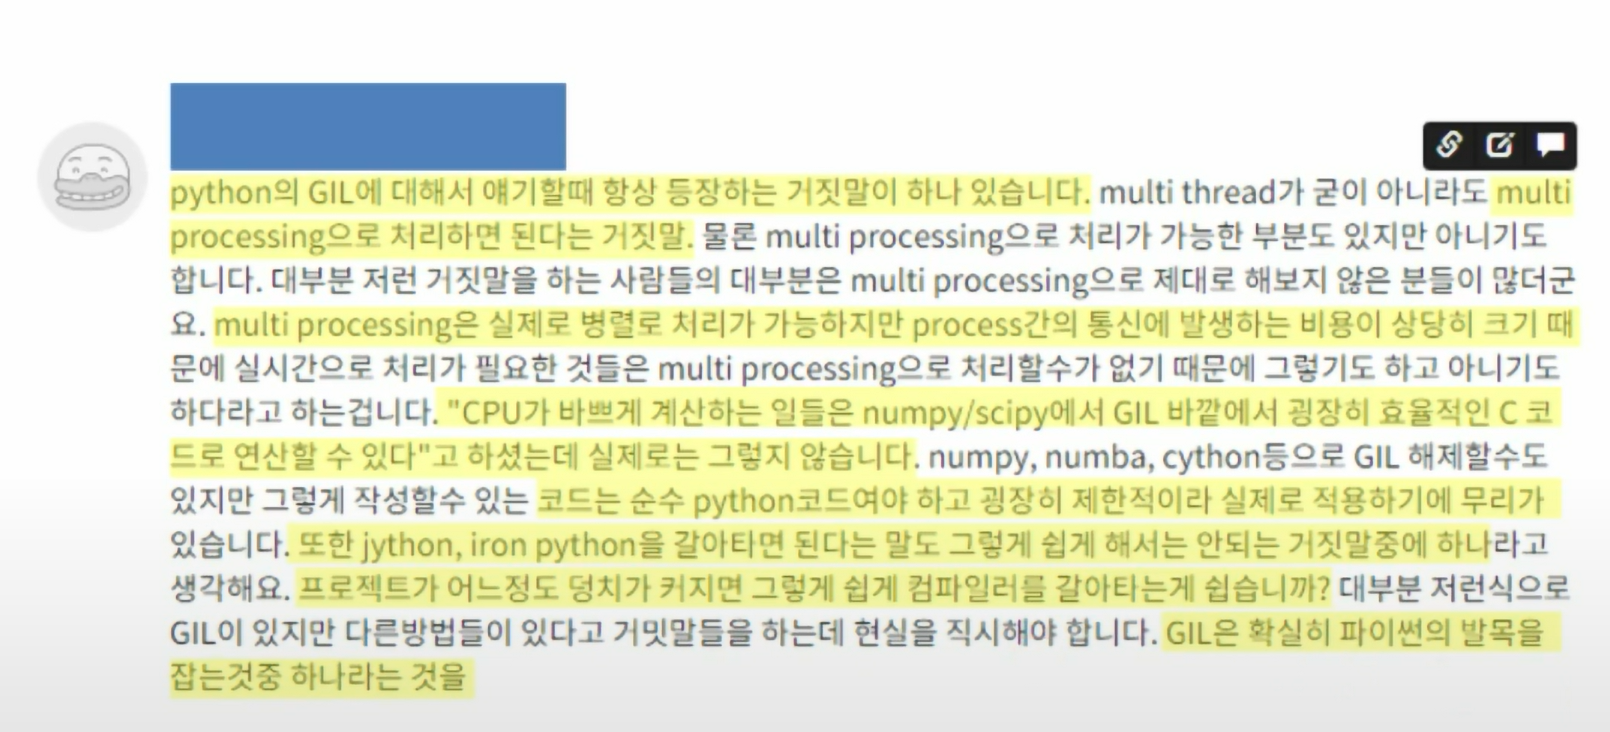



* 파이썬의 장단점
   * C, C++에 비해 속도가 느리고 GIL이라는 단점이 있다.
   * 하지만 높은 생산성, 방대한 라이브러리와 툴
   * 파이썬을 사용할 수밖에 없다면 속도와 생산성 사이의 trade-off 고려해야
   * 코딩하는 초롱, 파이썬 병렬 프로그래밍 with GIL https://youtu.be/SyIvYUgDbjA

# 17.4 Executor.map() 실험(Experimenting with Executor.map)

In [ ]:
from time import sleep, strftime
from concurrent import futures


def display(*args):  # <1> 자신이 받은 인수 앞에 [HH:MM:SS] 포맷 타임스탬프 찍어 출력
    print(strftime('[%H:%M:%S]'), end=' ')
    print(*args)


def loiter(n):  # <2> 시작할 때 메시지 출력, 인수로 받은 n초 동안 잠자고, 마지막 메시지 출력
    msg = '{}loiter({}): doing nothing for {}s...'
    display(msg.format('\t'*n, n, n))
    sleep(n)
    msg = '{}loiter({}): done.'
    display(msg.format('\t'*n, n))
    return n * 10  # <3> 결과를 가져오는 방법을 보여주기 위해 loiter()는 n*10 반환


def main():
    display('Script starting.')
    executor = futures.ThreadPoolExecutor(max_workers=3)  # <4> 스레드 3개 가진 ThreadPoolExecutor 객체 생성
    results = executor.map(loiter, range(5))  # <5> executor에 5개 작업 요청. 작업자 스레드가 3개뿐이므로 일단 loiter(0), loiter(1), loiter(2) 작업만 먼저 실행. map() 메서드는 논블로킹 메서드
    display('results:', results)  # <6> executor.map()이 반환한 값을 바로 출력. 제너레이터 반환
    display('Waiting for individual results:')
    for i, result in enumerate(results):  # <7> _f.result() 메서드는 _f 완료될 때까지 블로킹되므로, 다음 번 결과 나올 때까지 이 루프는 블로킹된다
        display('result {}: {}'.format(i, result))


main()

[11:00:55] Script starting.
[11:00:55] loiter(0): doing nothing for 0s...
[11:00:55] loiter(0): done.
[11:00:55] 	loiter(1): doing nothing for 1s...
[11:00:55] 		loiter(2): doing nothing for 2s...
[11:00:55][11:00:55] results: <generator object Executor.map.<locals>.result_iterator at 0x7f455d632b20>
[11:00:55] Waiting for individual results:
[11:00:55] result 0: 0
 			loiter(3): doing nothing for 3s...
[11:00:56] 	loiter(1): done.
[11:00:56] 				loiter(4): doing nothing for 4s...
[11:00:56] result 1: 10
[11:00:57] 		loiter(2): done.
[11:00:57] result 2: 20
[11:00:58] 			loiter(3): done.
[11:00:58] result 3: 30
[11:01:00] 				loiter(4): done.
[11:01:00] result 4: 40


* Executor.map()은 호출한 순서 그대로 반환하는 특징
* 스레드는 동시에 일어날 이벤트들이 실제로 어떤 순서로 발생하는지 정확히 예측할 수 없다.

# 17.5 진행 상황 출력하고 에러를 처리하며 내려받기(Downloads with Progress Display and Error Handling)

In [ ]:
import collections

import requests
import tqdm

from flags2_common import main, save_flag, HTTPStatus, Result


DEFAULT_CONCUR_REQ = 1
MAX_CONCUR_REQ = 1

# BEGIN FLAGS2_BASIC_HTTP_FUNCTIONS
def get_flag(base_url, cc):
    url = '{}/{cc}/{cc}.gif'.format(base_url, cc=cc.lower())
    resp = requests.get(url)
    if resp.status_code != 200:  # <1>
        resp.raise_for_status()
    return resp.content


def download_one(cc, base_url, verbose=False):
    try:
        image = get_flag(base_url, cc)
    except requests.exceptions.HTTPError as exc:  # <2>
        res = exc.response
        if res.status_code == 404:
            status = HTTPStatus.not_found  # <3>
            msg = 'not found'
        else:  # <4>
            raise
    else:
        save_flag(image, cc.lower() + '.gif')
        status = HTTPStatus.ok
        msg = 'OK'

    if verbose:  # <5>
        print(cc, msg)

    return Result(status, cc)  # <6>
# END FLAGS2_BASIC_HTTP_FUNCTIONS

# BEGIN FLAGS2_DOWNLOAD_MANY_SEQUENTIAL
def download_many(cc_list, base_url, verbose, max_req):
    counter = collections.Counter()  # <1>
    cc_iter = sorted(cc_list)  # <2>
    if not verbose:
        cc_iter = tqdm.tqdm(cc_iter)  # <3>
    for cc in cc_iter:  # <4>
        try:
            res = download_one(cc, base_url, verbose)  # <5>
        except requests.exceptions.HTTPError as exc:  # <6>
            error_msg = 'HTTP error {res.status_code} - {res.reason}'
            error_msg = error_msg.format(res=exc.response)
        except requests.exceptions.ConnectionError as exc:  # <7>
            error_msg = 'Connection error'
        else:  # <8>
            error_msg = ''
            status = res.status

        if error_msg:
            status = HTTPStatus.error  # <9>
        counter[status] += 1  # <10>
        if verbose and error_msg: # <11>
            print('*** Error for {}: {}'.format(cc, error_msg))

    return counter  # <12>
# END FLAGS2_DOWNLOAD_MANY_SEQUENTIAL

if __name__ == '__main__':
    main(download_many, DEFAULT_CONCUR_REQ, MAX_CONCUR_REQ)

In [ ]:
import collections
from concurrent import futures

import requests
import tqdm  # <1> 진행 막대 표시 라이브러리 임포트

from flags2_common import main, HTTPStatus  # <2>
from flags2_sequential import download_one  # <3>

DEFAULT_CONCUR_REQ = 30  # <4> -m/ - -max_req 명령행 옵션 지정하지 않으면 이 숫자가 최대 동시 요청 수가 되고, 스레드 풀의 크기로 사용된다
MAX_CONCUR_REQ = 1000  # <5> -m/ - -max_req에 상관없이 동시 요청 수 제한(안전장치)


def download_many(cc_list, base_url, verbose, concur_req):
    counter = collections.Counter()
    with futures.ThreadPoolExecutor(max_workers=concur_req) as executor:  # <6>
        to_do_map = {}  # <7>
        for cc in sorted(cc_list):  # <8>
            future = executor.submit(download_one,
                            cc, base_url, verbose)  # <9> executor.submit() 호출할 때마다 하나의 콜러블 실행 스케줄링하며 Future 객체 반환, 첫 번째 인수는 콜러블이고 나머지 인수는 이 콜러블에 전달된다.
            to_do_map[future] = cc  # <10>
        done_iter = futures.as_completed(to_do_map)  # <11> futures.as_completed()는 완료된 순서대로 Future 객체 생성하는 반복자 반환
        if not verbose:
            done_iter = tqdm.tqdm(done_iter, total=len(cc_list))  # <12>
        for future in done_iter:  # <13> 완료되는 순서대로 Future 객체 반복
            try:
                res = future.result()  # <14> Future 객체의 result() 메서드 호출하면 콜러블이 반환한 값이나 콜러블 실행하는 동안 잡은 예외가 발생
                                       # result() 메서드는 Future가 완료될 때까지 블로킹될 수 있지만, as_completed()가 완료된 Future 객체만 반환하므로 여기서는 result() 메서드가 블로킹되지 않는다.
            except requests.exceptions.HTTPError as exc:  # <15> 발생할 수 있는 예외 처리
                error_msg = 'HTTP {res.status_code} - {res.reason}'
                error_msg = error_msg.format(res=exc.response)
            except requests.exceptions.ConnectionError as exc:
                error_msg = 'Connection error'
            else:
                error_msg = ''
                status = res.status

            if error_msg:
                status = HTTPStatus.error
            counter[status] += 1
            if verbose and error_msg:
                cc = to_do_map[future]  # <16>
                print('*** Error for {}: {}'.format(cc, error_msg))

    return counter


if __name__ == '__main__':
    main(download_many, DEFAULT_CONCUR_REQ, MAX_CONCUR_REQ)

* (GIL이라는 제한에도 불구하고) 파이썬 스레드는 입출력 위주의 애플리케이션에 잘 맞으며, 경우에 따라 concurrent.futures 패키지를 이용하면 아주 간단히 처리할 수 있다.
   * C 언어로 작성된 모든 표준 라이브러리는 GIL 해제하므로, 스레드가 입출력 기다리는 동안 파이썬 스케줄러가 다른 스레드로 전환할 수 있음
   * 그러고 나서 concurrent.futures.ProcessPoolExecutor 클래스 이용해서 다중 프로세스 구현하면 GIL 우회해서 여러 CPU 코어 사용하므로, 작업 속도 높일 수 있음

* 계산 위주 작업을 수행하는 경우에는 여러 프로세스를 실행해서 GIL 피해나가야
   * futures.ProcessPoolExecutor 사용하면 간단히 처리할 수 있지만, 애플리케이션 구조가 이 클래스에 잘 맞지 않는 경우에는 **멀티프로세싱 패키지** 사용해야
   * 간단한 프로그램이라면 약간만 수정해도 스레딩 대신 멀티프로세싱 사용할 수 있다
   * https://docs.python.org/3/library/multiprocessing.html

# 17.6 요약(Chapter Summary)

# 17.7 읽을거리(Further Reading)

* Brian Quinlan, "The Future Is Soon!" @ PyCon Australia 2010 https://pyvideo.org/video/480/pyconau-2010--the-future-is-soon/
* PEP 3148 - futures - execute computations asynchronously https://peps.python.org/pep-3148/
* Python Library and Extension FAQ "Can’t we get rid of the Global Interpreter Lock?" https://docs.python.org/3/faq/library.html#can-t-we-get-rid-of-the-global-interpreter-lock
* Guido van Rossum & Jesse Noller, “It isn’t Easy to Remove the GIL" https://www.artima.com/weblogs/viewpost.jsp?thread=214235; "Python Threads and the Global Interpreter Lock." http://jessenoller.com/2009/02/01/python-threads-and-the-global-interpreter-lock/
* PEP 371 - Addition of the multiprocessing package to the standard library https://peps.python.org/pep-0371/

* GIL에 관하여
   * GIL 덕분에 CPython 인터프리터와 C 언어로 작성된 확장의 구현이 간단해질 수 있었고, 덕분에 파이썬은 지금과 같은 인기를 누릴 수 있었음
   * 지난 수년간 필자는 GIL 때문에 파이썬 스레드가 장난감 수준의 애플리케이션 외에는 거의 쓸모가 없다고 생각했으나,
   * 표준 라이브러리의 모든 블로킹 입출력 함수가 GIL을 해제한다는 사실을 알고서는, 파이썬 스레드가 입출력 위주 시스템에서 아주 뛰어나다는 점을 깨달았다

* 동시성을 잘 지원하는 최신 언어 중 Go와 Elixir은 파이썬을 잠식할 가능성이 크다. 그러나 이제는 asyncio가 있다?